In [1]:
# event selection filters PC, PT ratios
# TIMING
# parameterize the time profile of the rising edge in terms of fractio on totoal induced charge
# t_rise = t_90 - t_10
# various ranges of rise time - comment on variations in the PC and PT

# look at distribution of rise times all, photopeak
# create energy spectra with (4) diff cuts, comment on PC and PT, choose filter to improve PC ratio

# PREDICT SIGNAL SHAPE
# predict signal shape at one radial location in detector
# using collimated souce experimetally validate shape
# repeat for multiple radial locations
# preditc signal shapes from multipleK2G6R6 gamma-ray interactions (?), can you find any in data that match

# PILE-UP
# using strong gamma source take data
# evaluate trade-off btwn energy res and pile-up for diff filters

In [2]:
# RISE TIME STUDY

# calc signal rise time
# make spectrum
# calc resolution of peak
# calc PC ratio
# calc PT ratio

# do with diff rise-time windows

# make hist of rise times all, photopeak for cs
# repeat diff sources

# do get finer timing, interpolate between points!

In [1]:
%run ../scripts/lab2_analysis_functions.py

KeyboardInterrupt: 

In [2]:
from __future__ import division

In [3]:
def calculate_signal_rise_time_interpolation(signal, plot=False):
    signal = signal[900:1090]
    x = np.linspace(0, 1090-900, 1090-900)
    sig = np.convolve(signal, np.ones((30,))/30, mode='valid')
    maxval = np.amax(sig)
    tenval = maxval* 0.10
    twentyval = maxval* 0.20
    seventyval = maxval * 0.7
    ninetyval = maxval * 0.9
    
    twentyindex = 0
    tenindex = 0
    ninetyindex = 0
    seventyindex = 0
    for i in range(0, np.argmax(sig), 1):
        if sig[i] <= tenval:
            tenindex = i
    for i in range(tenindex, len(sig), 1):
        if sig[i] >= ninetyval:
            ninetyindex = i
            break
    minindex = 0
    maxindex = 0
    for i in range(0, np.argmax(signal), 1):
        if signal[i] <= 0.01*np.amax(sig):
            minindex = i
    for i in range(minindex, len(signal), 1):
        if signal[i] >= twentyval:
            twentyindex = i + 1
            break
    for i in range(tenindex, len(signal), 1):
        if signal[i] <= seventyval:
            seventyindex = i
    for i in range(seventyindex, len(signal), 1):
        if signal[i] >= maxval:
            maxindex = i + 1
            break
   # maxindex = np.argmax(signal)
    x_fit_low = x[int(minindex): int(twentyindex)]
    sig_fit_low = signal[int(minindex): int(twentyindex)]
    m, b = np.polyfit(x_fit_low, sig_fit_low, deg=1)
    fit_low = b + m * x_fit_low
    rise_low = (tenval - b / m) 
   
    x_fit_high = x[seventyindex: maxindex]
    sig_fit_high = signal[seventyindex: maxindex]
    m, b = np.polyfit(x_fit_high, sig_fit_high, deg=1)
    fit_high = b + m * x_fit_high
    rise_high = (ninetyval - b / m)
    
    risetime = (rise_high - rise_low) # ns
    print('fit')
    print(rise_high)
    print(rise_low)
    print(risetime)
    print('basic')
    print(ninetyindex)
    print(tenindex)
    print(ninetyindex - tenindex)
    if plot==True:
        #print(risetime)
        #plt.plot(x[minindex - 2: maxindex + 2], signal[minindex - 2: maxindex + 2])
        plt.plot(signal, 'o')
        plt.plot(np.linspace(int(minindex),int(twentyindex),len(signal[minindex:twentyindex])),signal[minindex:twentyindex], 'o')
        plt.plot(np.linspace(int(seventyindex),int(maxindex),len(signal[seventyindex:maxindex])),signal[seventyindex:maxindex], 'o')
        plt.plot(sig)
        #plt.plot(x[190:200], fit)
        plt.plot(maxindex, ninetyval, 'o')
        plt.plot(minindex, tenval, 'o')
        plt.show()
    return risetime

In [4]:
def calculate_signal_rise_time(signal, plot=False):
    signal = signal[900:1090]
    sig = np.convolve(signal, np.ones((30,))/30, mode='valid')
    maxval = np.amax(sig)
    tenval = maxval* 0.10
    ninetyval = maxval * 0.9
    
    tenindex = 0
    ninetyindex = 0
    for i in range(0, np.argmax(signal), 1):
        if signal[i] <= tenval:
            tenindex = i
    for i in range(tenindex, len(signal), 1):
        if signal[i] >= ninetyval:
            ninetyindex = i
            break
    
    risetime = (ninetyindex - tenindex) * 10
    if plot==True:
        #print(risetime)
        #plt.plot(x[minindex - 2: maxindex + 2], signal[minindex - 2: maxindex + 2])
        plt.plot(signal)
        plt.plot(sig)
        #plt.plot(x[190:200], fit)
        plt.plot(ninetyindex, ninetyval, 'o')
        plt.plot(tenindex, tenval, 'o')
        plt.show()
    return risetime

In [5]:
signal = baseline_correction(cs_raw_data_2[5, :])
calculate_signal_rise_time(signal, plot=True)

NameError: name 'cs_raw_data_2' is not defined

In [6]:
filename = './Cs_70cm.h5'

hf = tables.open_file(filename, "r")
cs_raw_data_2 = import_data(filename)
cs_event_data_2 = hf.root.EventData.read()
hf.close()

# mask retriggered events
mask_2 = (cs_event_data_2['retrigger'] == 1)
cs_raw_data_2[mask_2] = 0

In [ ]:
filename = '/home/anp/Desktop/lab2/data/Cs_70cm.h5'

hf = tables.open_file(filename, "r")
cs_raw_data_0 = import_data(filename)
cs_event_data_0 = hf.root.EventData.read()
hf.close()

# mask retriggered events
mask_0 = (cs_event_data['retrigger'] == 1)
cs_raw_data_0[mask_0] = 0

filename = '/home/anp/Desktop/lab2/data/Cs_70cm_3.h5'

hf = tables.open_file(filename, "r")
cs_raw_data_3 = import_data(filename)
cs_event_data_3 = hf.root.EventData.read()
hf.close()

# mask retriggered events
mask_3 = (cs_event_data['retrigger'] == 1)
cs_raw_data_3[mask_3] = 0

cs_baseline = np.mean(cs_raw_data[:len(cs_raw_data),0:99],1).reshape((len(cs_raw_data),1))
cs_baseline_corrected_signals = cs_raw_data[:len(cs_raw_data),] - cs_baseline

In [121]:
f = open('../data/risetimes.txt','w')
cs_risetimes= []
i = 0
print(len(cs_raw_data))
cs_raw_data_short = cs_raw_data[0:10000, 0:]
for sig in cs_raw_data_short:
    sig = baseline_correction(sig)
    #sig = sig[800:1100]
    dt = calculate_signal_rise_time(sig)
    if dt > 20 and dt < 1500:
        cs_risetimes.append(dt)
        E = cs_event_data['ADC_value'][i]
        f.write(str(E) + ', ' + str(dt) + '\n')
    i += 1
f.close()

164075


In [6]:
nrgs = []
risetimes = []
#nrgs = np.array(nrgs)
#risetimes = np.array(risetimes)
with open('../data/risetimes_2.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    i = 0
    for row in csv_reader:
        #print(row)
        #print(row[0])
        #print(row[1])
        nrgs.append(float(row[0]))
        risetimes.append(float(row[1]))
        i += 1
    print(i)
with open('../data/risetimes_3.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    i = 0
    for row in csv_reader:
        #print(row)
        #print(row[0])
        #print(row[1])
        nrgs.append(float(row[0]))
        risetimes.append(float(row[1]))
        i += 1
    print(i)
nrgs = np.array(nrgs)
risetimes = np.array(risetimes)
print(risetimes[2])

161767
183850
210.0


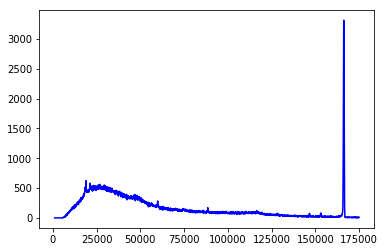

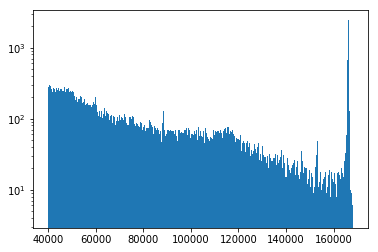

In [7]:
all_counts, bin_edges = np.histogram(nrgs, bins=2048, range = [1e3,1.75e5])
all_bins = (bin_edges[1:]+bin_edges[:-1])/2 # bin centers from bin edges
plt.plot(all_bins, all_counts, 'b')
plt.show()
plt.hist(nrgs, bins=2048, range = [40e3,1.68e5], log=True )
plt.show()

In [19]:
risetimes_all_y, bin_edges = np.histogram(risetimes, bins=40, range =[0, 400])
risetimes_all_x = (bin_edges[1:]+bin_edges[:-1])/2 # bin centers from bin edges

nrg_mask = ((nrgs > 165500) & (nrgs < 167000))
risetimes_peak = risetimes[nrg_mask]
risetimes_peak_y, bin_edges = np.histogram(risetimes_peak, bins=40, range =[0, 400])
risetimes_peak_x = (bin_edges[1:]+bin_edges[:-1])/2 # bin centers from bin edges

plt.plot(risetimes_all_x, risetimes_all_y, 'b')
plt.plot(risetimes_peak_x, risetimes_peak_y, 'r')
plt.savefig('../figures/risetimes.pdf')
plt.show()

In [40]:
ratio = []
for i in range(0, len(risetimes_all_x), 1):
    if risetimes_peak_y[i] == 0:
        ratio.append(0)
    else:
        ratio.append(risetimes_peak_y[i]/risetimes_all_y[i])
plt.plot(risetimes_all_x, ratio, 'g')
plt.savefig('../figures/risetimes_ratio.pdf')
plt.show()

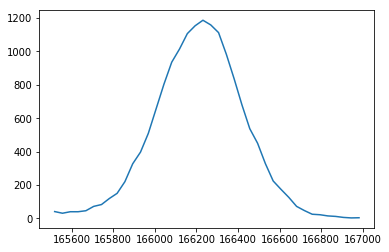

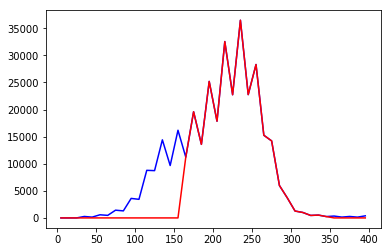

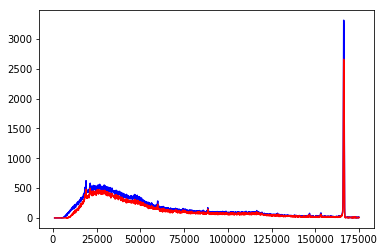

In [30]:
cut_mask = ((risetimes > 150) & (risetimes < 350))
nrgs_cut = nrgs[cut_mask]
rise_cut = risetimes[cut_mask]

risetimes_cut_y, bin_edges = np.histogram(rise_cut, bins=40, range =[0, 400])
risetimes_cut_x = (bin_edges[1:]+bin_edges[:-1])/2 # bin centers from bin edges

nrgs_cut_y, cut_edges = np.histogram(nrgs_cut, bins=2048, range = [1e3,1.75e5])
nrgs_cut_x = (cut_edges[1:]+cut_edges[:-1])/2 # bin centers from bin edges

peak_cut_y, edges = np.histogram(nrgs_cut, bins=40, range = [1.655e5, 1.67e5])
peak_cut_x = (edges[1:]+edges[:-1])/2 # bin centers from bin edges
plt.plot(peak_cut_x, peak_cut_y)
plt.show()
peak_all_y, edges = np.histogram(nrgs, bins=40, range = [1.655e5, 1.67e5])
peak_all_x = (edges[1:]+edges[:-1])/2 # bin centers from bin edges

plt.plot(risetimes_all_x, risetimes_all_y, 'b')
plt.plot(risetimes_cut_x, risetimes_cut_y, 'r')
plt.show()
plt.plot(all_bins, all_counts, 'b')
plt.plot(nrgs_cut_x, nrgs_cut_y, 'r')
plt.show()

In [26]:
# calc peak to compton for chanigng window
# calc peak to total for changing window
# find optimal window for P/T, P/C
# interpolate for finer risetimes
# signal prediction

261650
331543
19872
331543
0.0599379266038
15739
261650
0.0601528759794


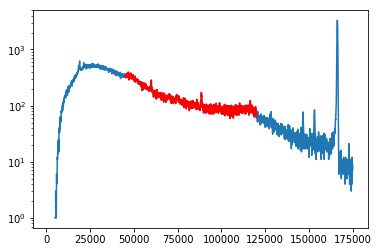

19872
123465
0.160952496659


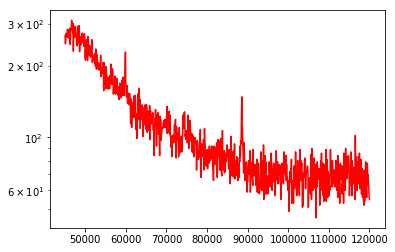

15739
98558
0.15969276974


In [38]:
def peak_to_total(peak_counts, all_counts):
    peak = np.sum(peak_counts)
    total = np.sum(all_counts)
    p_t = peak / total
    print(peak)
    print(total)
    print(p_t)
    return p_t

def peak_to_compton(peak_counts, all_bins, all_counts):
    peak = np.sum(peak_counts)
    compton_mask = ((all_bins  > 4.5e4) & (all_bins  < 1.2e5))
    compton_counts = all_counts[compton_mask]
    compton = np.sum(compton_counts)
    plt.semilogy(all_bins[compton_mask], all_counts[compton_mask], 'r')
    plt.show()
    p_c = peak / compton
    print(peak)
    print(compton)
    print(p_c)
    return p_c

plt.semilogy(all_bins, all_counts)

print(np.sum(nrgs_cut_y))
print(np.sum(all_counts))
pt = peak_to_total(peak_all_y, all_counts)
pt = peak_to_total(peak_cut_y, nrgs_cut_y)
pc = peak_to_compton(peak_all_y, all_bins, all_counts)
pc = peak_to_compton(peak_cut_y, nrgs_cut_x, nrgs_cut_y)


In [445]:
# mask events outside of risetime range
risetime_mask = np.array(50 < cs_risetimes < 500)
data = cs_event_data['ADC_value'][risetime_mask]
#mask = (cs_event_data['retrigger'] == 1)

NameError: name 'cs_risetimes' is not defined

In [93]:
cs_risetimes = np.array(cs_risetimes)
cs_nrgs = cs_event_data['ADC_value']
# print(cs_nrgs)
risetime_mask = np.zeros_like(cs_nrgs)
print(risetime_mask.size)
print(cs_risetimes.size)
risetime_mask =((cs_risetimes > 100) & (cs_risetimes < 500))
cs_nrgs_filtered = cs_event_data['ADC_value'][risetime_mask]
print(risetime_mask)
print()

42115
42115
[ True  True  True ...,  True  True False]
()


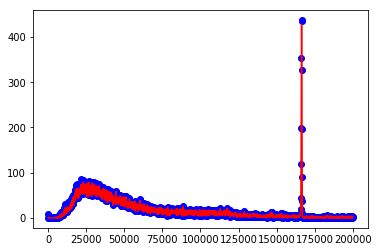

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # function evals   = 23
    # data points      = 200
    # variables        = 3
    chi-square         = 2514.658
    reduced chi-square = 12.765
    Akaike info crit   = 512.315
    Bayesian info crit = 522.210
[[Variables]]
    sigma:       195.421372 +/- 1.196875 (0.61%) (init= 146.4844)
    center:      1.6640e+05 +/- 1.196875 (0.00%) (init= 166406.2)
    amplitude:   2.1457e+05 +/- 1.14e+03 (0.53%) (init= 188085.9)
    fwhm:        460.182155 +/- 2.818426 (0.61%)  == '2.3548200*sigma'
    height:      438.039922 +/- 2.323392 (0.53%)  == '0.3989423*amplitude/max(1.e-15, sigma)'
[[Correlations]] (unreported correlations are <  0.500)
    C(sigma, amplitude)          =  0.577 



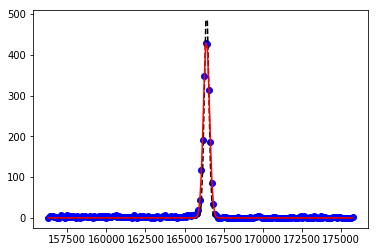

460.182155214
166397.090349
('fwhm', 0.27656000000000003)
0.0


In [94]:
cs_counts, bin_edges = np.histogram(cs_nrgs, bins=2048, range=[0,2e5])
cs_bins = (bin_edges[1:]+bin_edges[:-1])/2 # bin centers from bin edges
plt.plot(cs_bins, cs_counts, 'bo')
cs_counts, bin_edges = np.histogram(cs_nrgs_filtered, bins=2048, range=[0,2e5])
cs_bins = (bin_edges[1:]+bin_edges[:-1])/2 # bin centers from bin edges
plt.plot(cs_bins, cs_counts, 'r-')
plt.show()
cs_peak_fwhm, cs_peak_center = fit_gaussian_with_plot(cs_bins[1600:1800], cs_counts[1600:1800])
print(cs_peak_fwhm)
print(cs_peak_center)
print('fwhm', (round(cs_peak_fwhm / cs_peak_center, 7) * 100))
print((err * 100 / cs_peak_center))

In [ ]:
def calculate_pt(bins, counts):
    center = np.argmax(counts)
    cs_peak_fwhm, cs_peak_center = fit_gaussian_with_plot(cs_bins[1600:1800], cs_counts[1600:1800])
    
    
def calculate_pc(bins, counts):
    center = np.argmax(counts)
    cs_peak_fwhm, cs_peak_center = fit_gaussian_with_plot(cs_bins[1600:1800], cs_counts[1600:1800])
    

1790


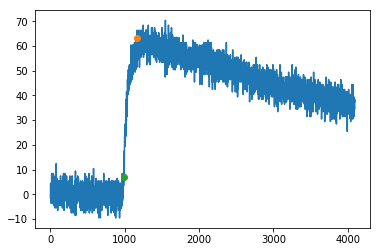

1720


2580


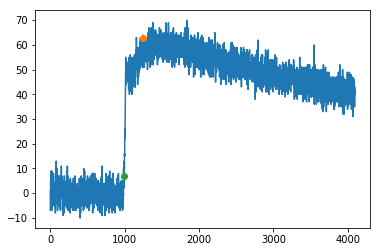

2860


2070


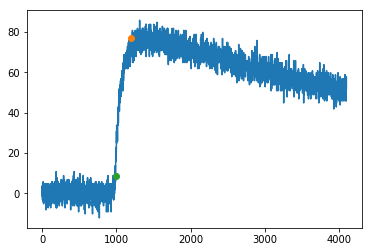

1950


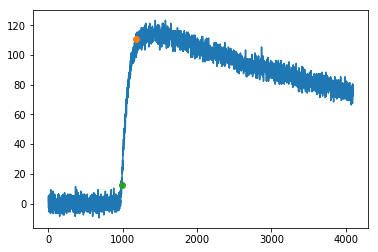

1680


3450


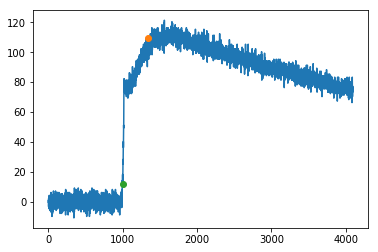

3260


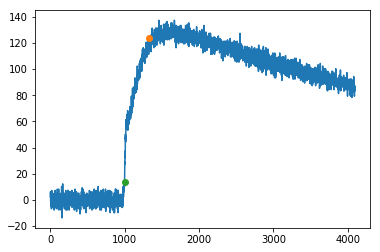

2870


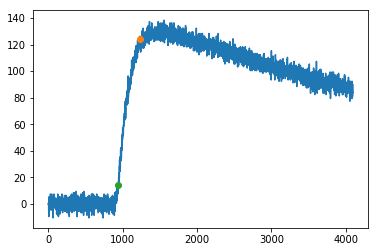

7290


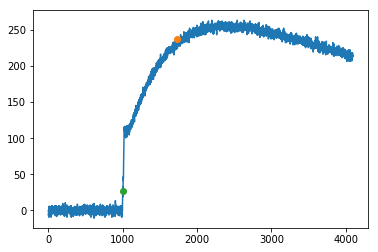

1690


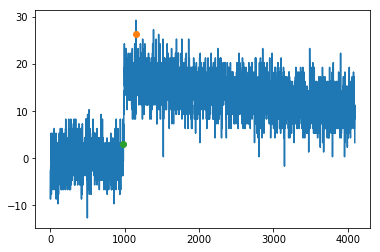

6550


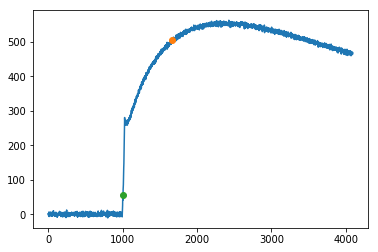

2880


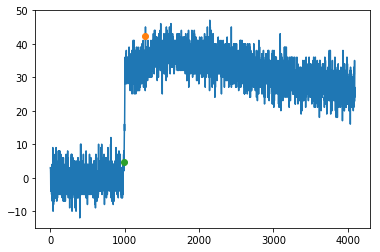

1690


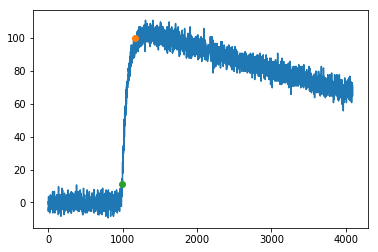

1530


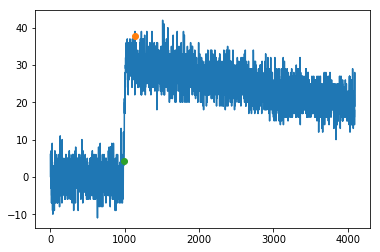

1750


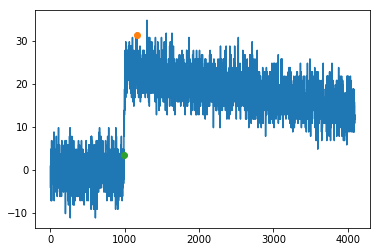

2890


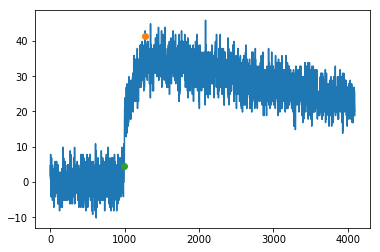

3210


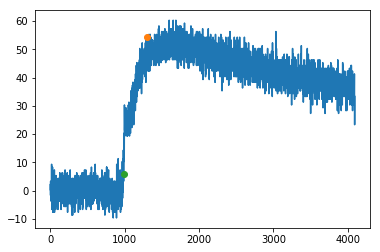

15990


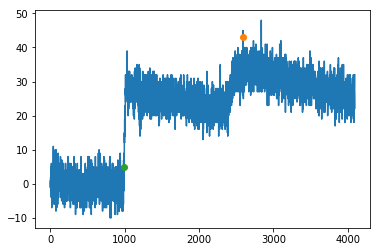

2190


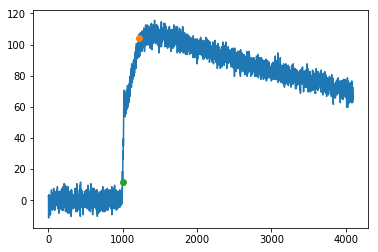

1550


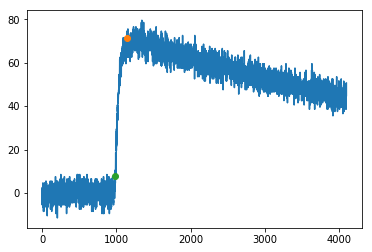

2810


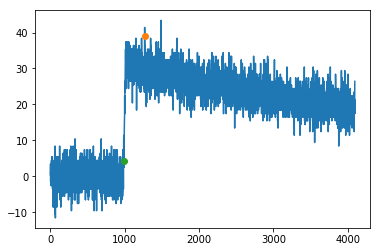

6290


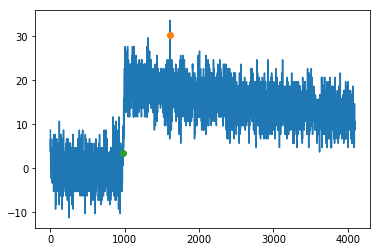

1870


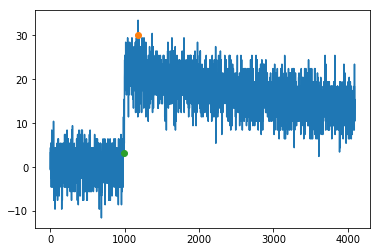

2970


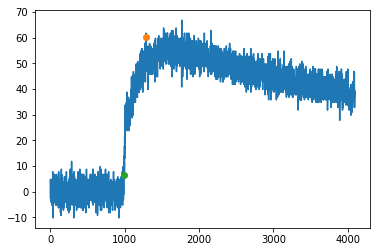

1750


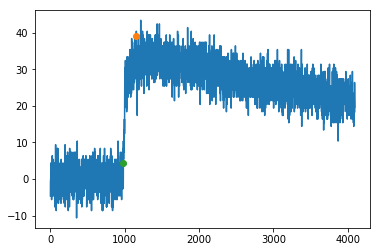

1540


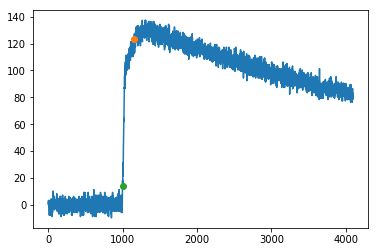

1770


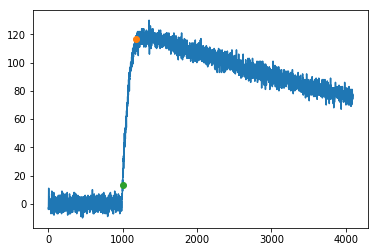

2870


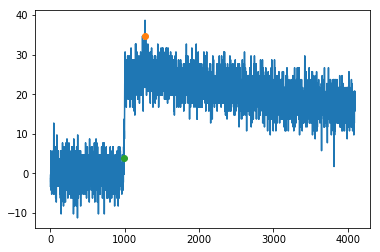

1990


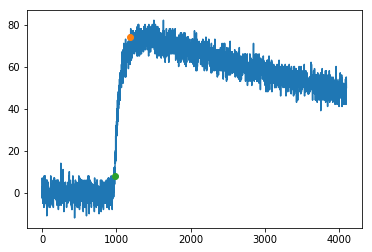

1870


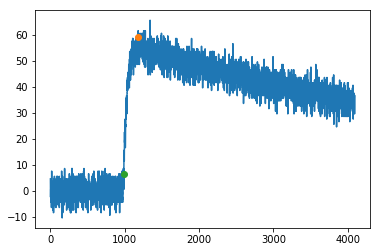

3390


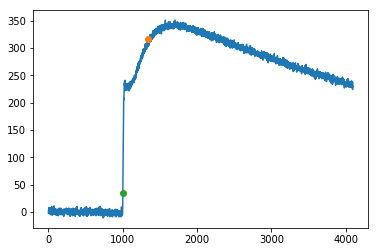

2010


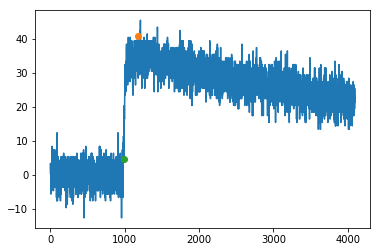

2190


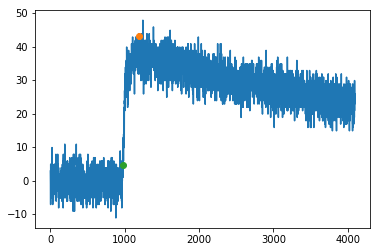

1530


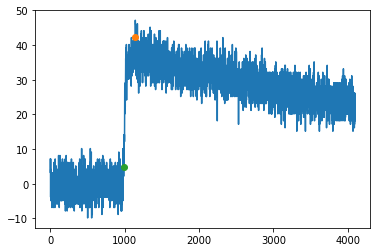

3050


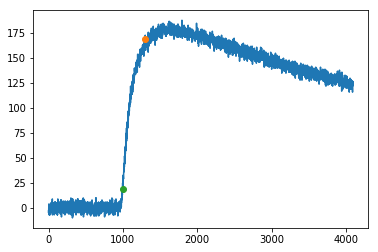

3900


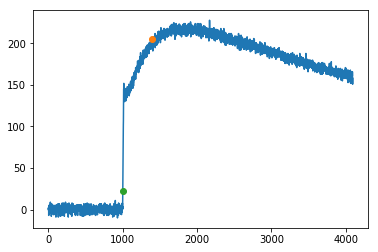

1590


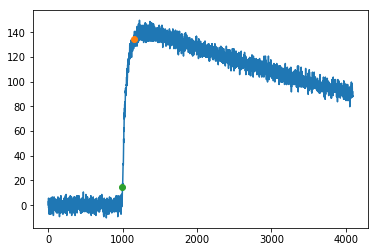

4980


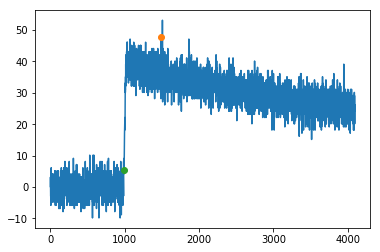

2190


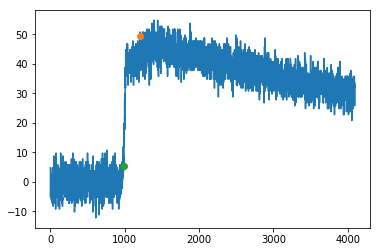

1700


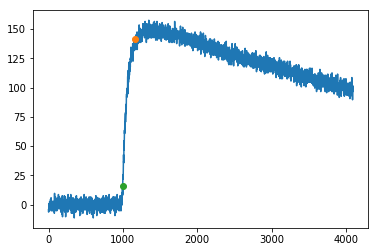

1870


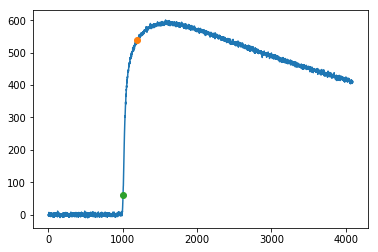

1520


2820


2330


3700


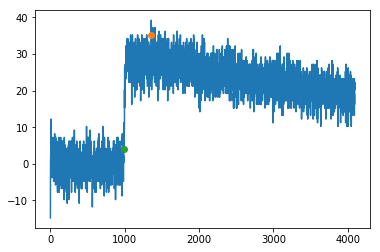

6730


1670


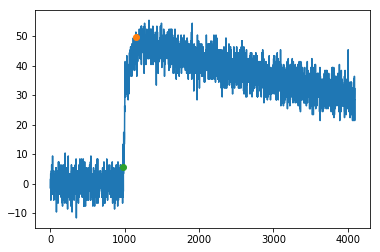

2110


1760


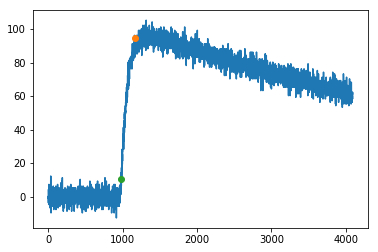

14500


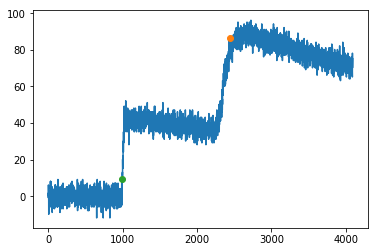

2730


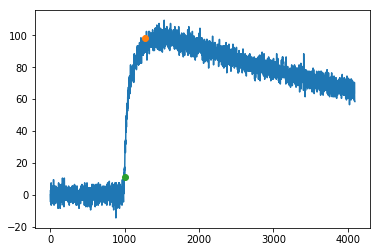

1990


3690


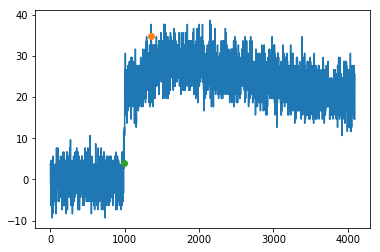

1550


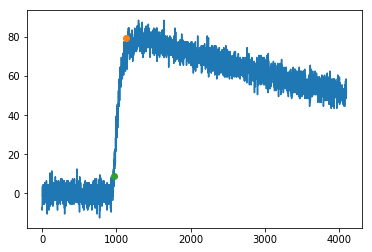

2070


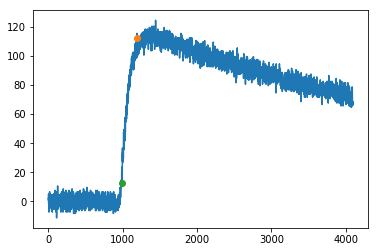

3660


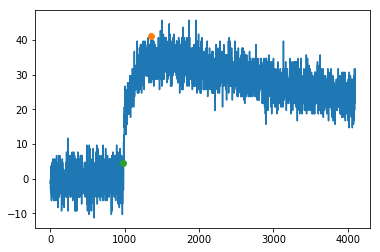

1760


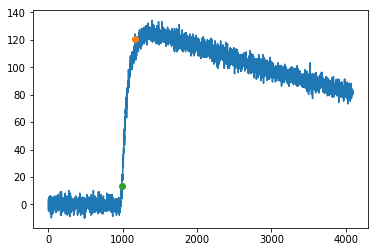

1700


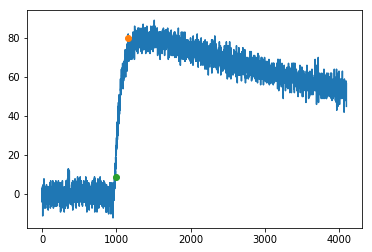

2130


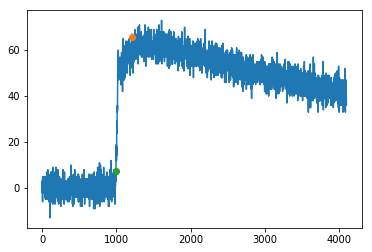

2510


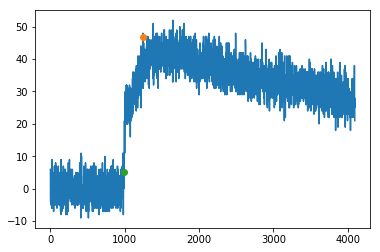

2340


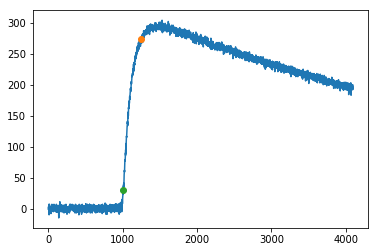

1920


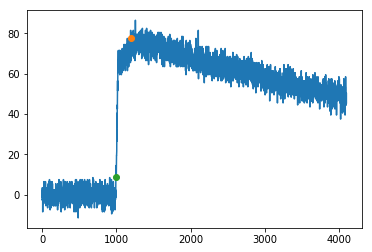

2600


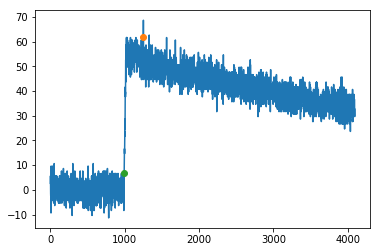

1790


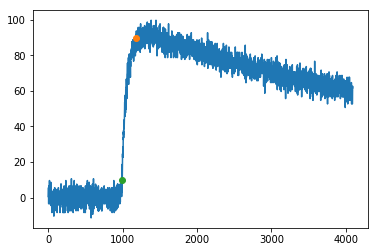

1870


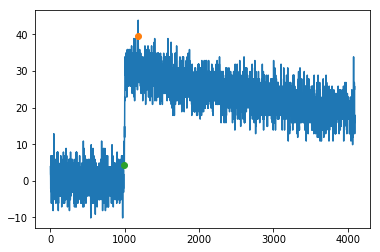

1790


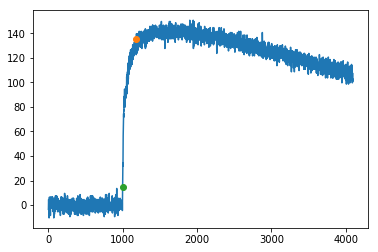

11730


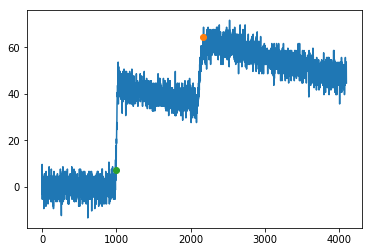

1550


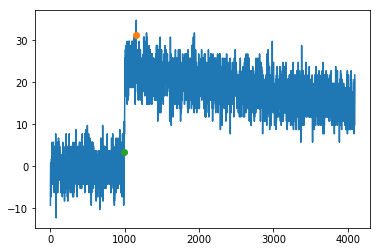

2310


1810


1650


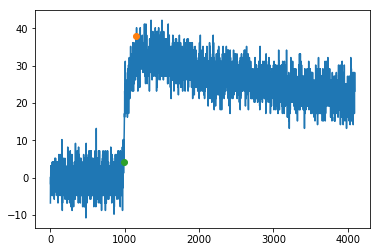

3590


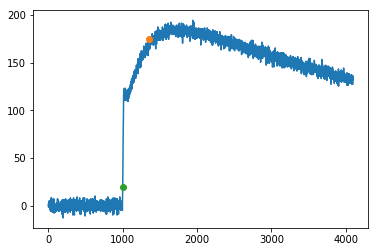

3830


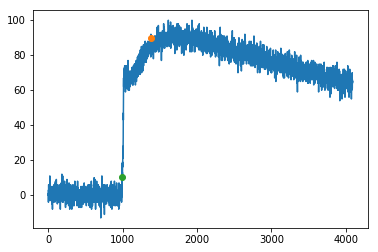

2610


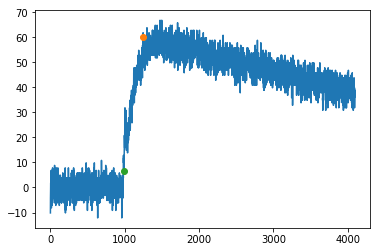

2410


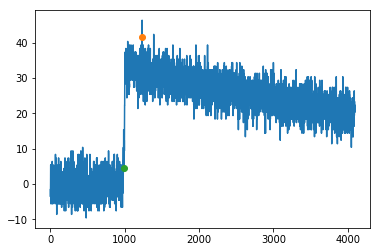

2910


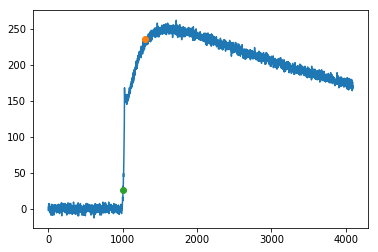

2370


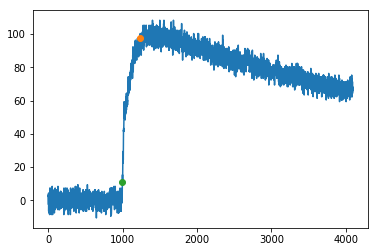

2200


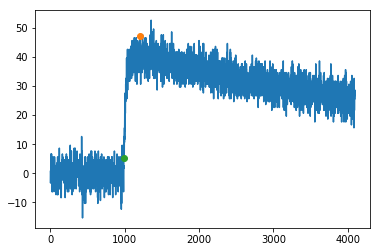

1890


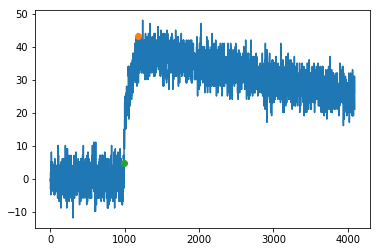

3330


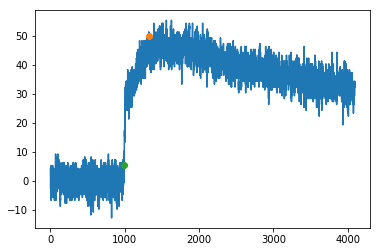

3660


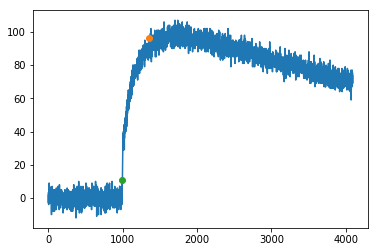

1650


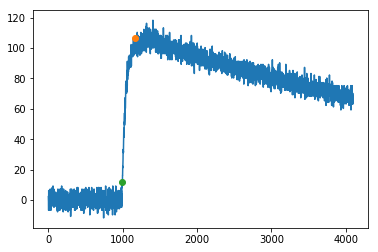

2960


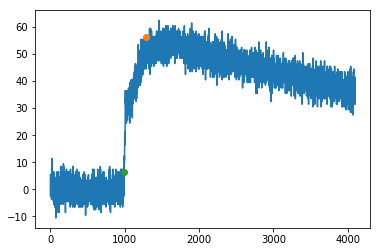

1770


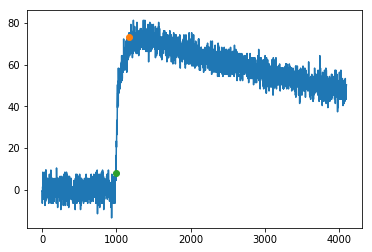

1850


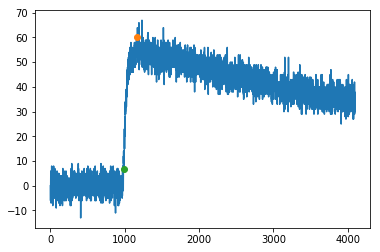

2410


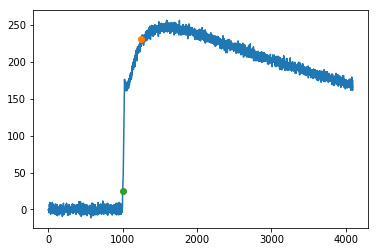

1550


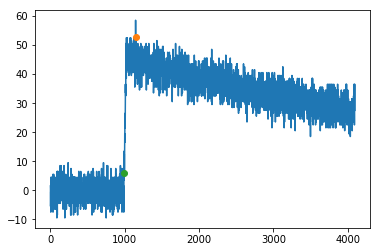

1930


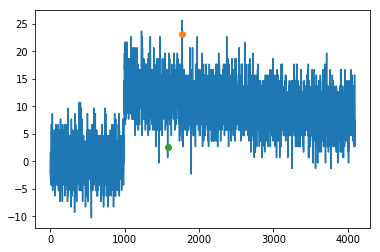

3430


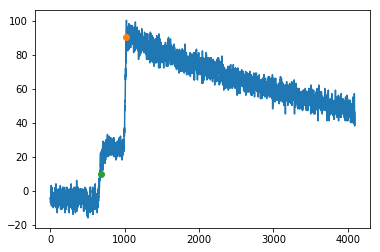

1750


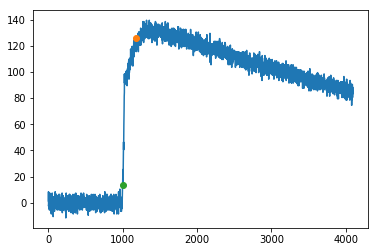

1930


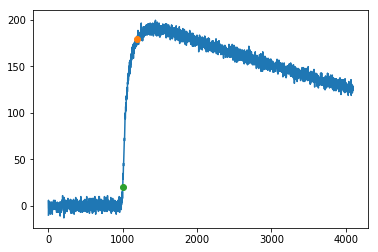

1810


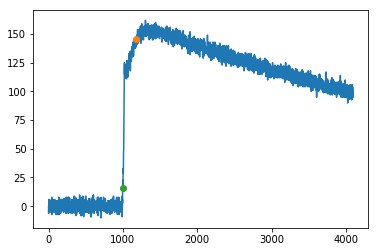

1850


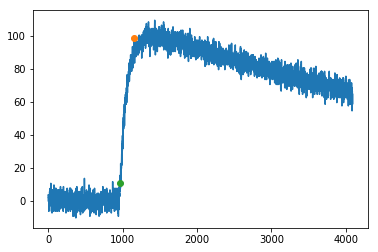

2330


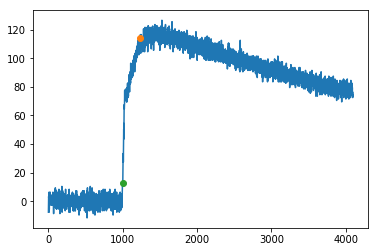

2600


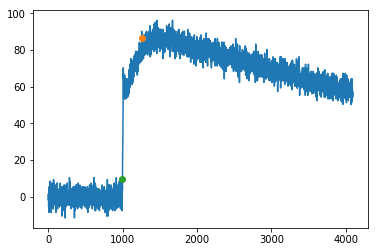

3820


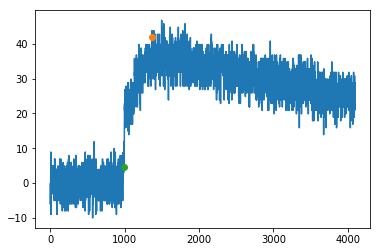

3230


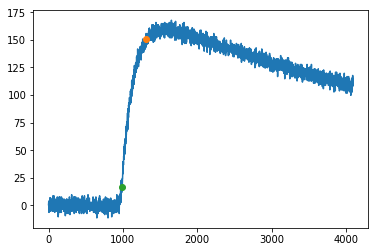

2970


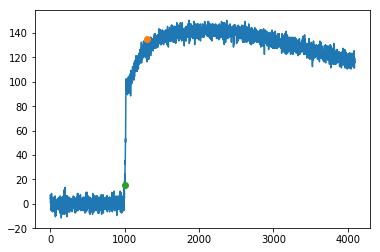

2430


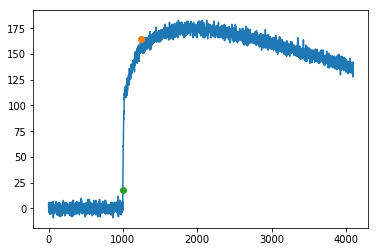

2410


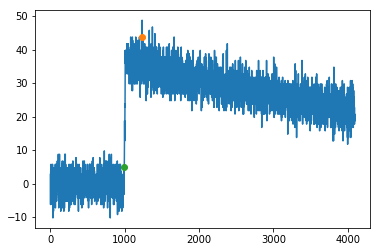

2180


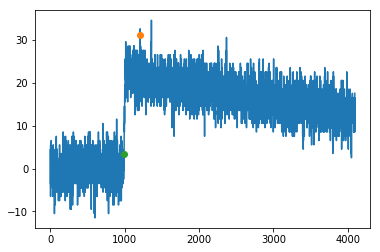

8830


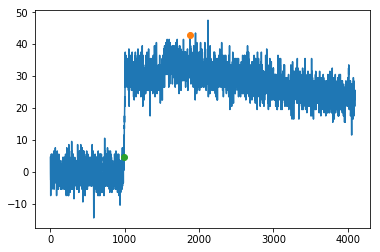

4050


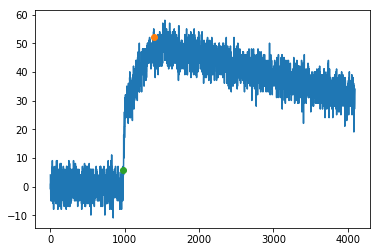

1650


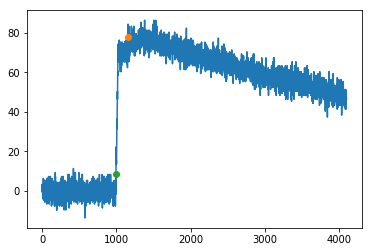

3310


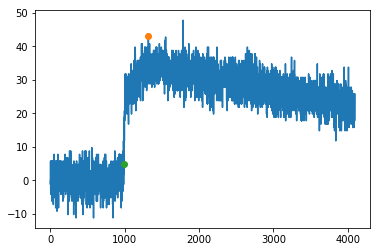

2390


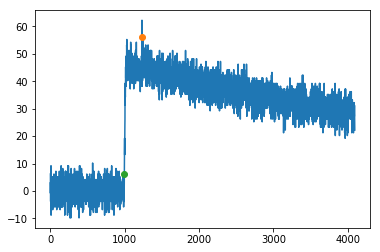

2160


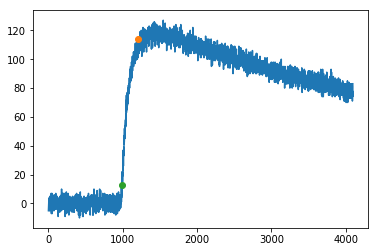

2520


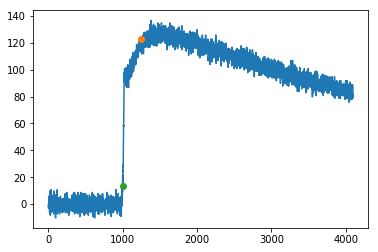

2220


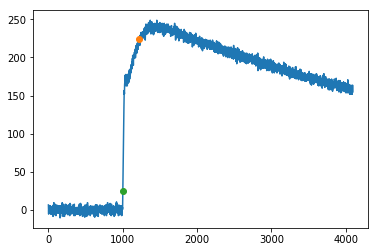

1650


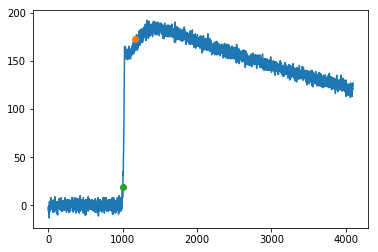

2410


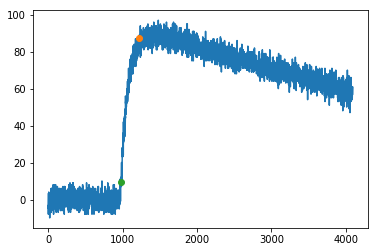

1820


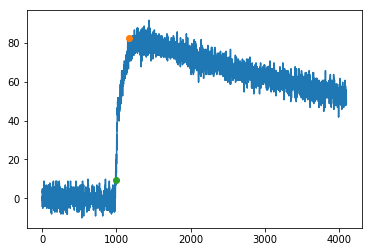

2570


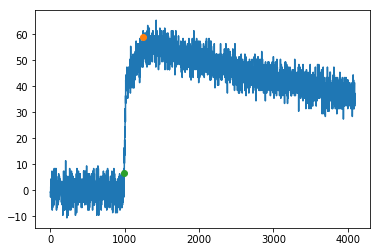

1600


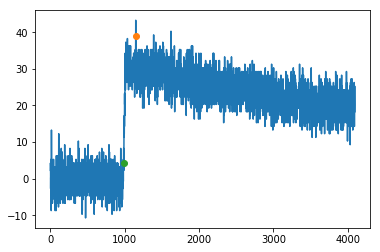

2250


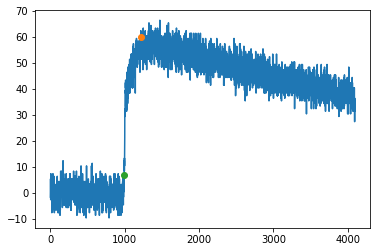

1840


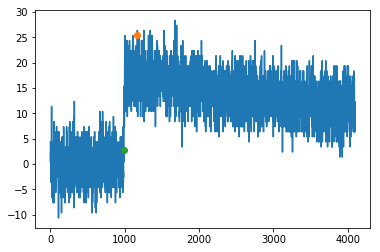

5910


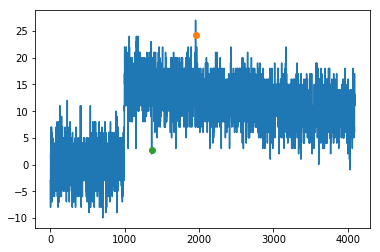

1700


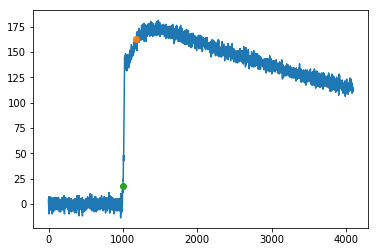

2680


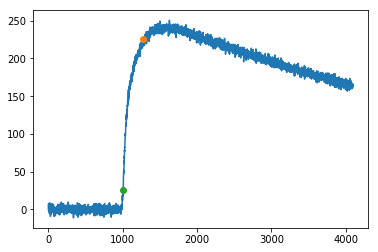

2330


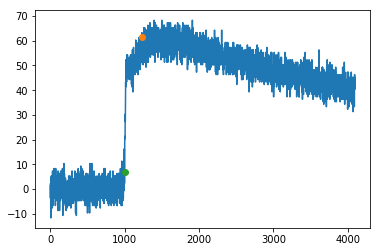

1620


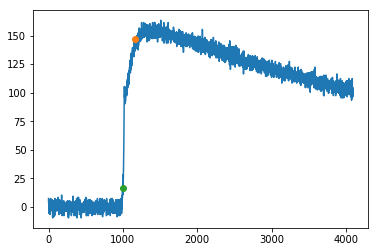

2150


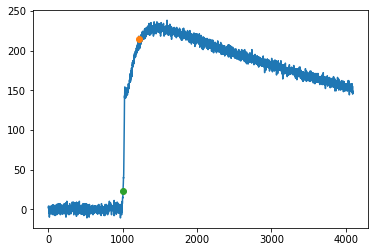

1890


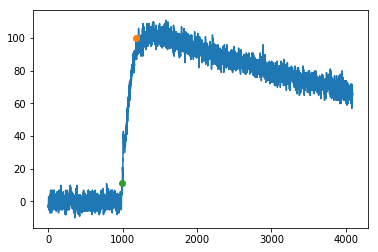

1710


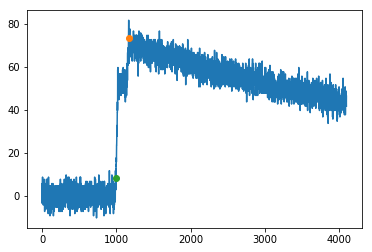

2380


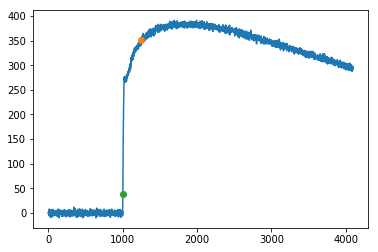

1790


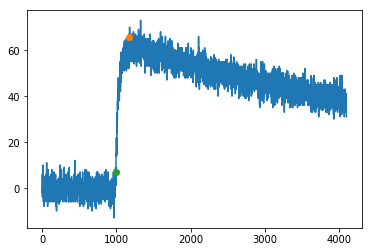

1550


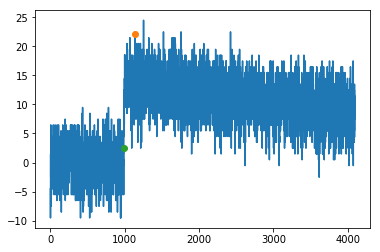

1890


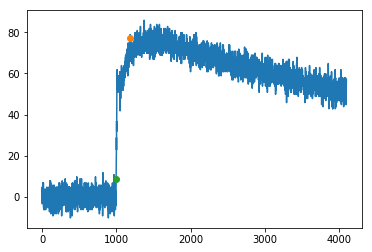

3620


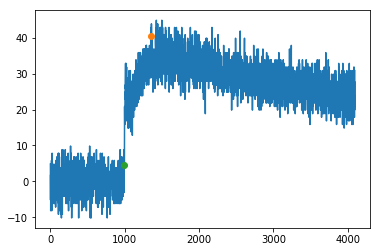

2550


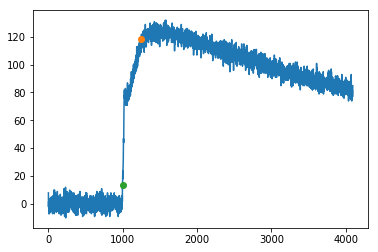

2130


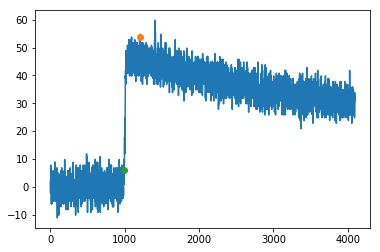

1640


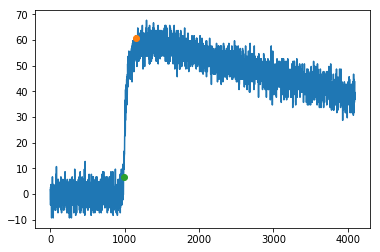

1570


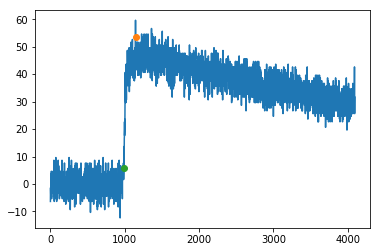

3350


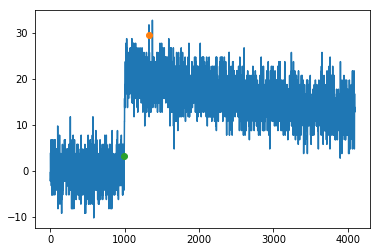

1630


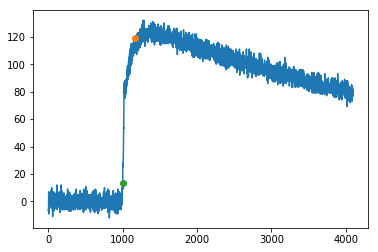

5930


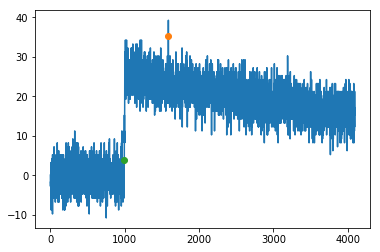

5170


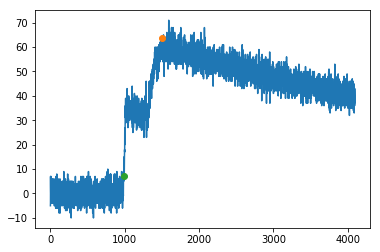

2470


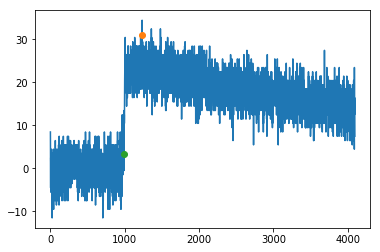

1620


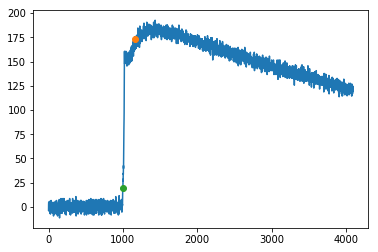

3350


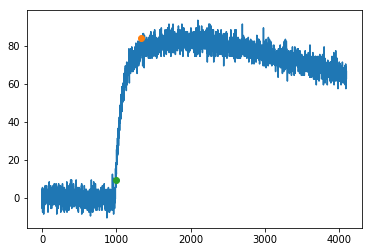

1910


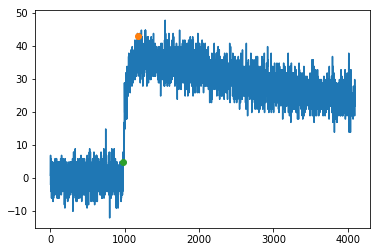

6030


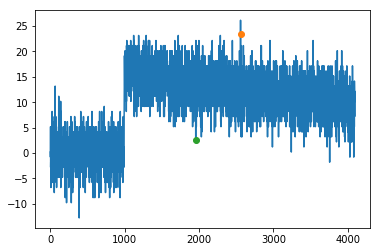

1730


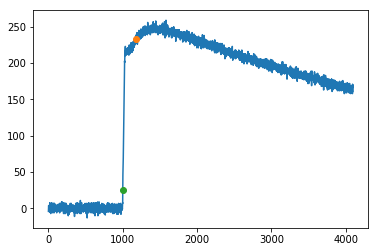

1710


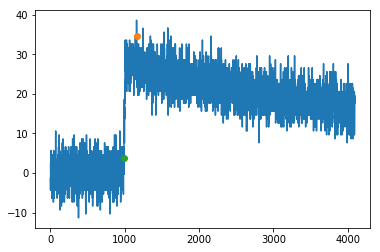

3710


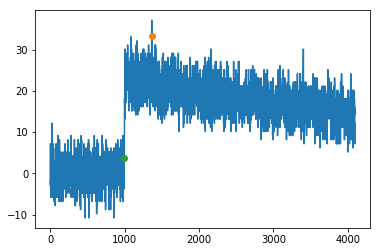

2880


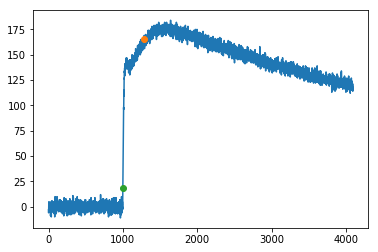

1590


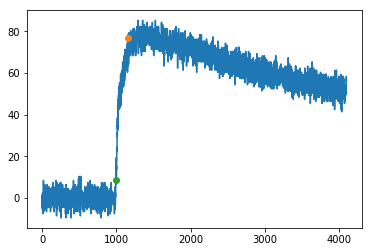

2880


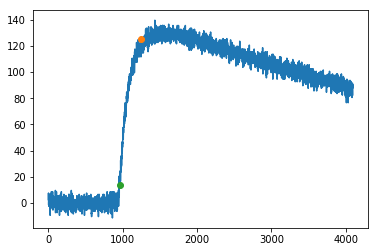

1670


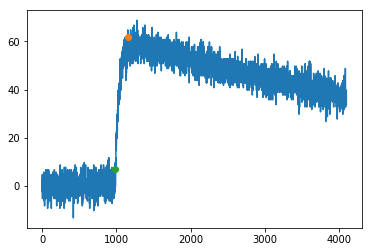

3190


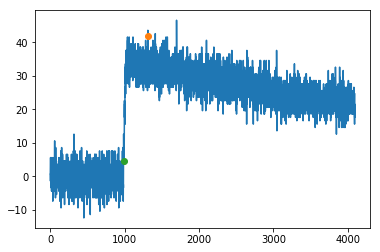

3030


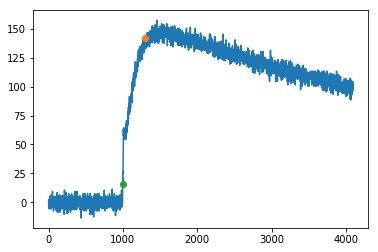

1800


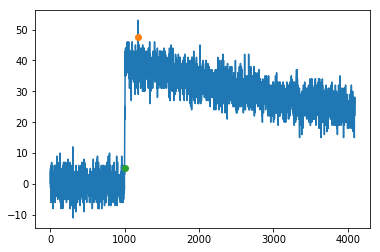

1810


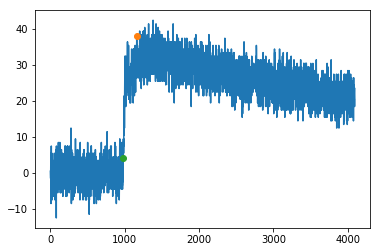

3580


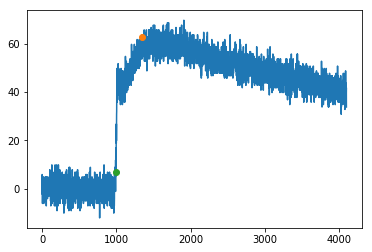

1630


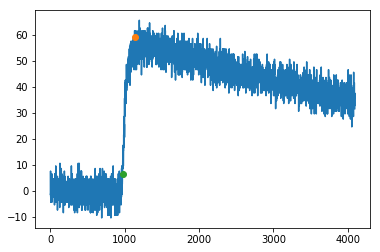

1570


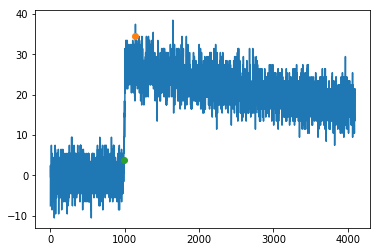

2240


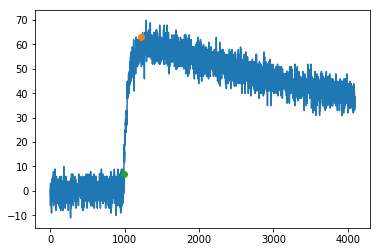

2170


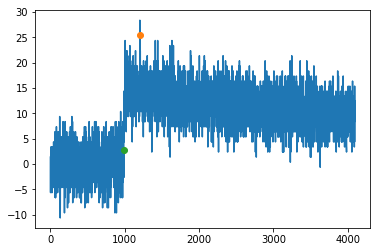

1570


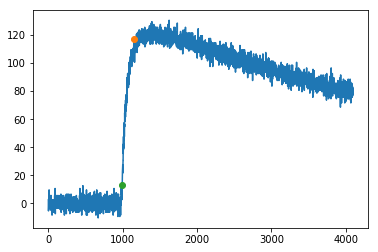

2290


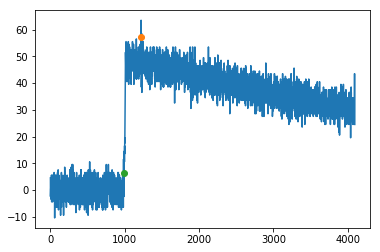

1900


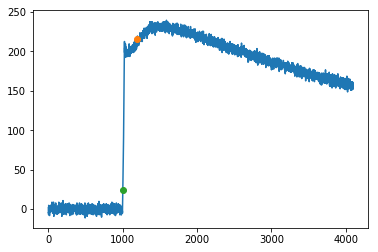

3170


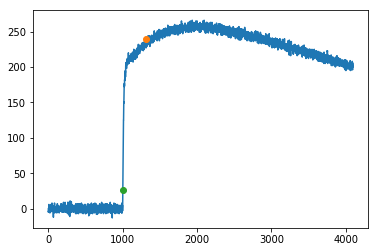

1760


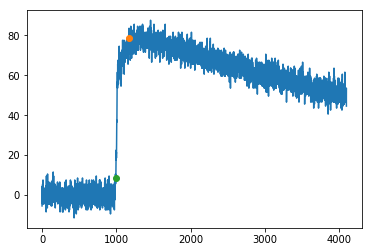

2360


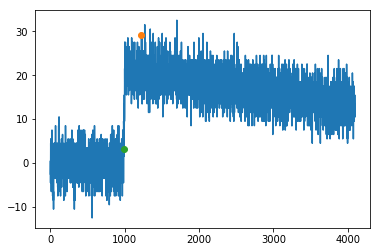

1630


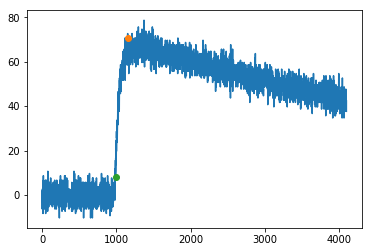

2020


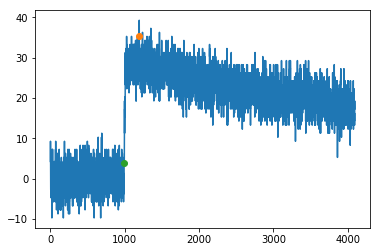

1680


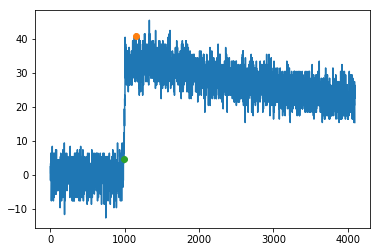

2980


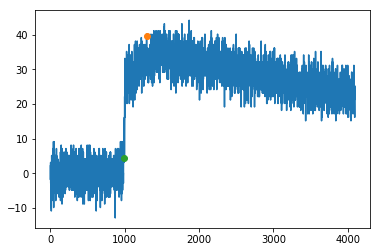

1590


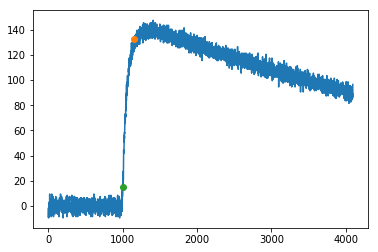

5790


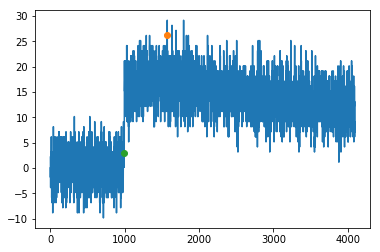

1620


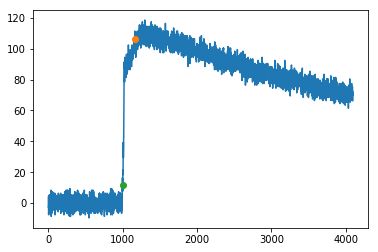

7450


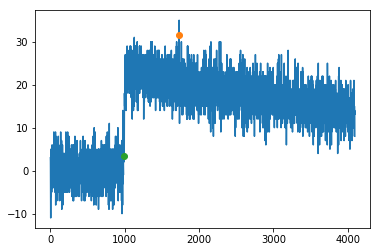

1570


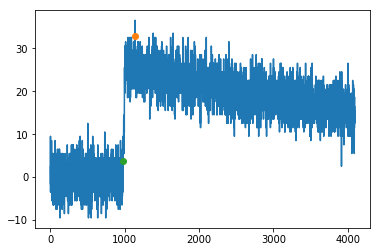

2070


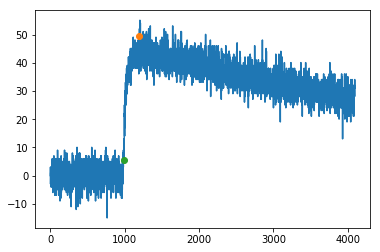

1910


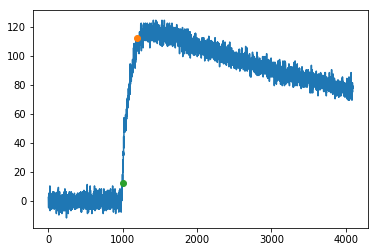

4490


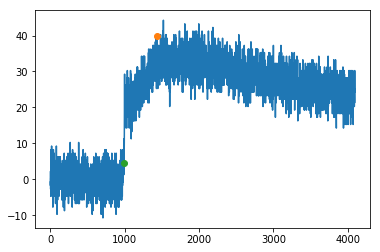

1870


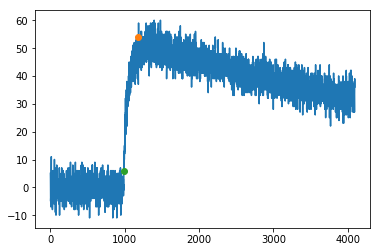

1630


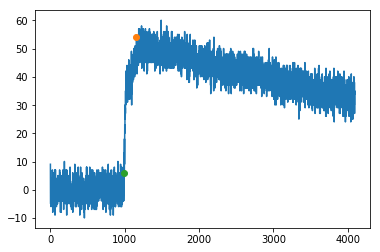

2690


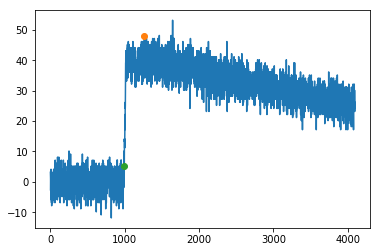

2910


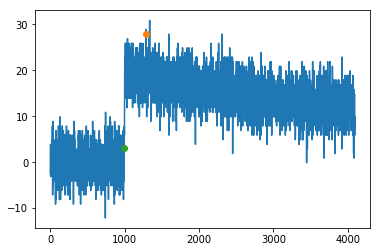

1650


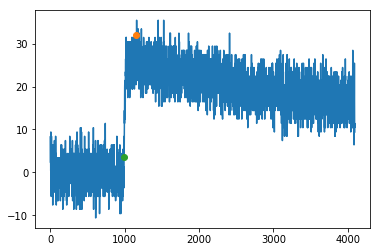

2090


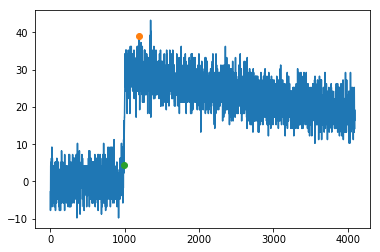

1720


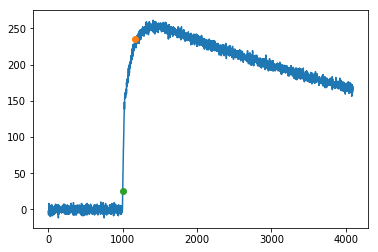

1610


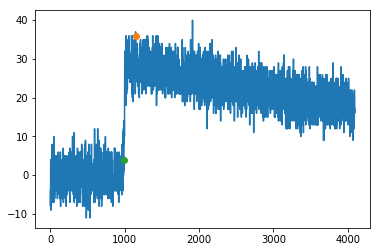

1750


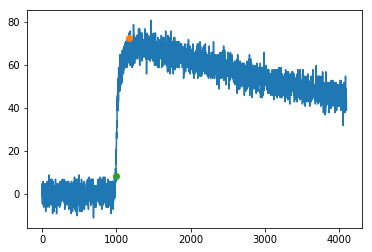

1510


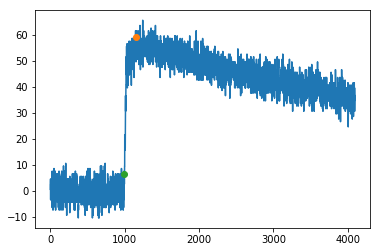

1970


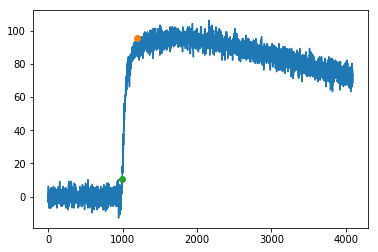

2100


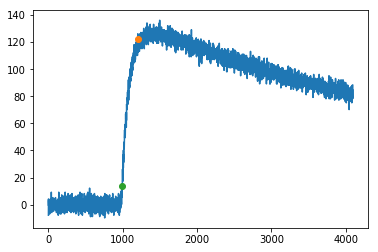

1990


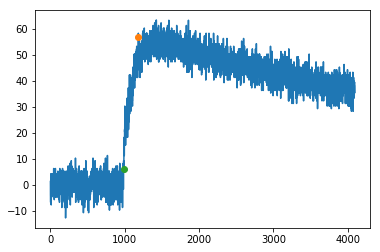

2830


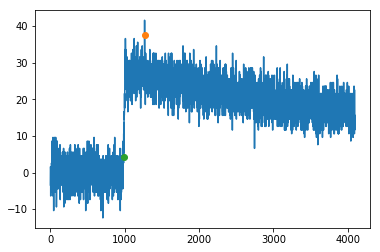

1980


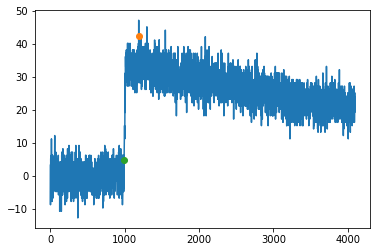

3270


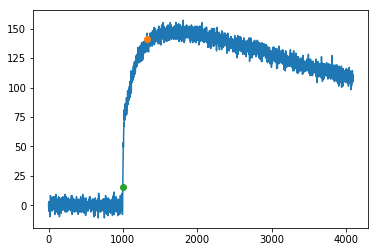

2680


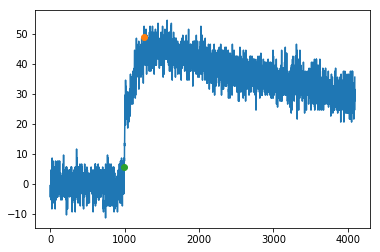

2260


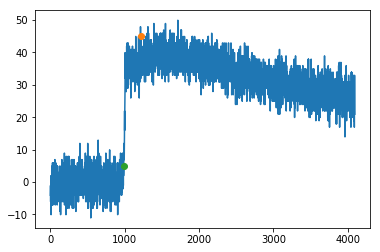

2870


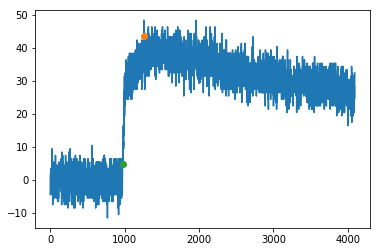

1630


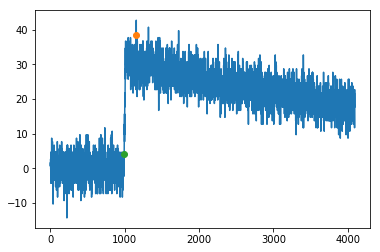

1580


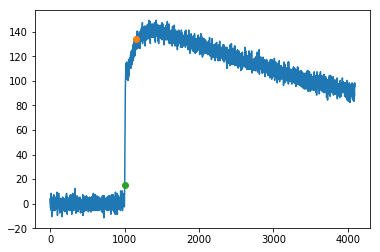

1700


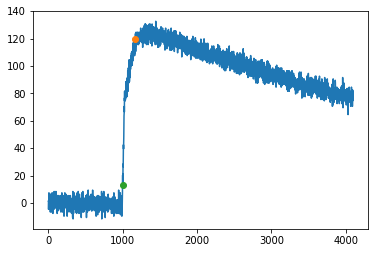

1840


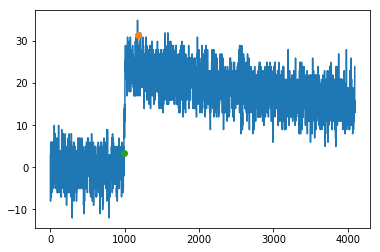

1760


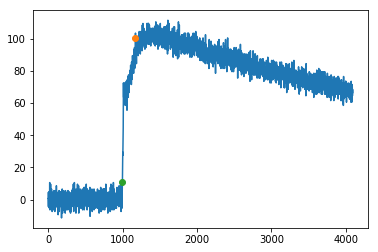

1870


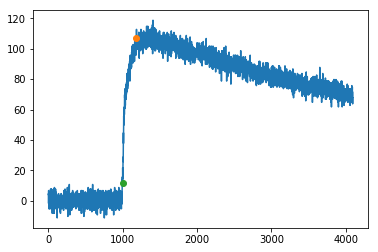

1830


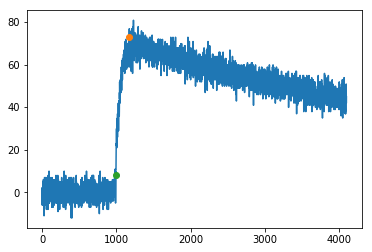

2320


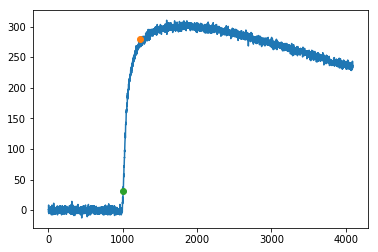

4010


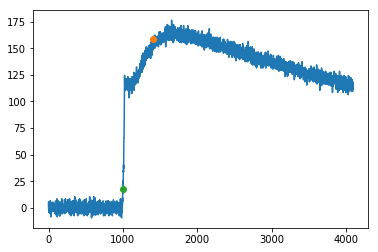

4170


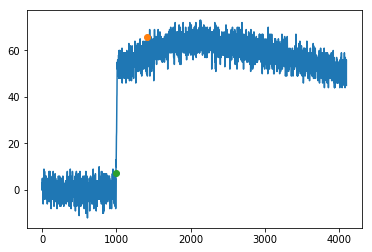

1970


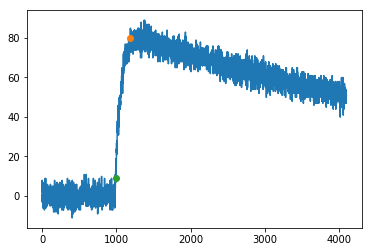

9570


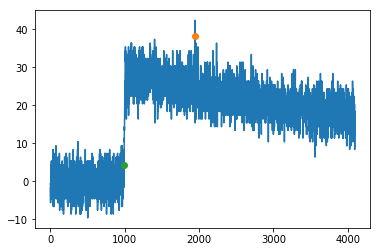

1600


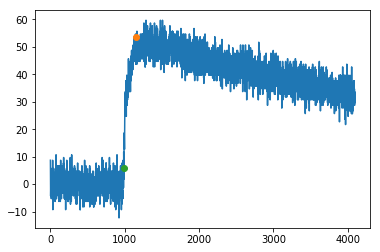

3940


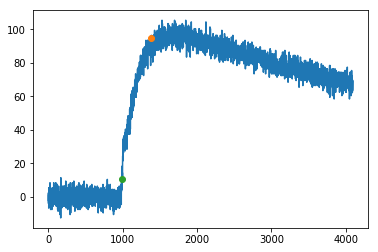

1660


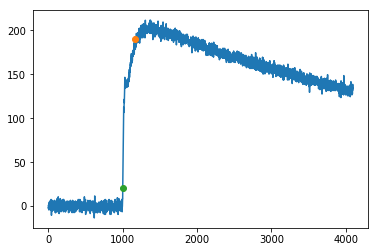

2590


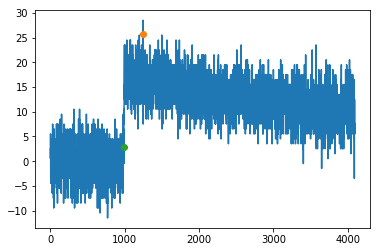

1900


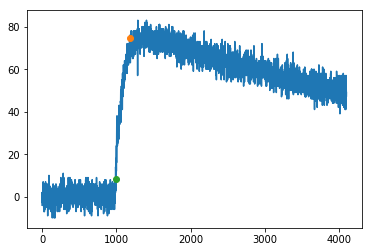

1650


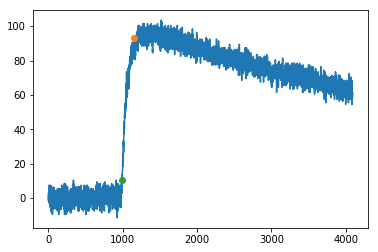

1810


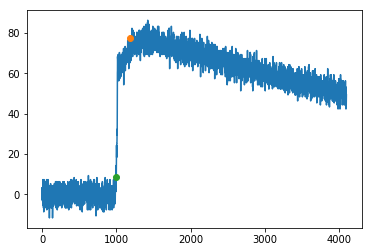

2890


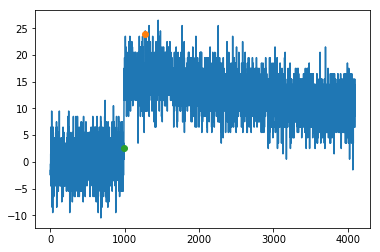

1510


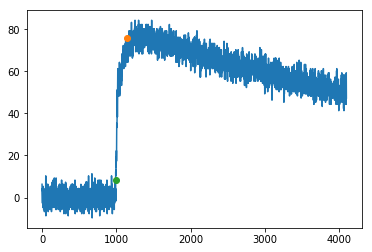

1510


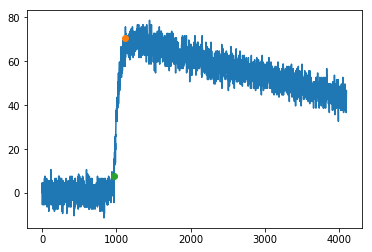

1570


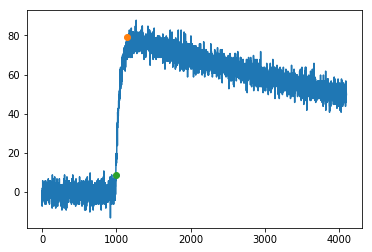

2930


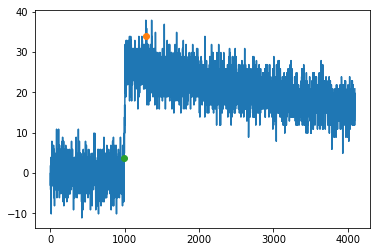

7680


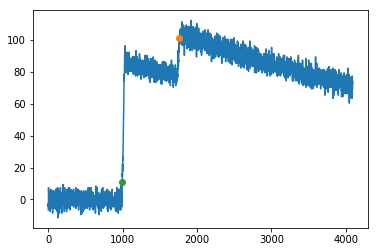

1910


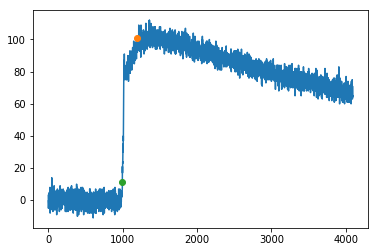

1590


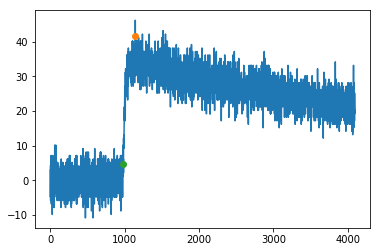

2050


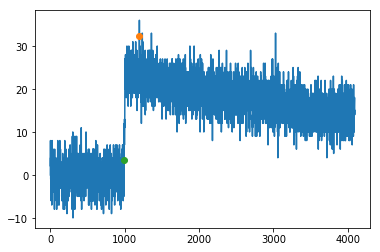

1910


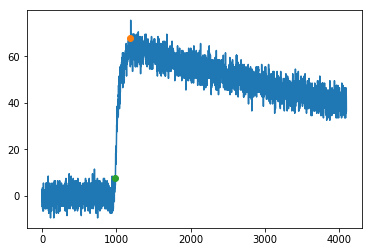

2030


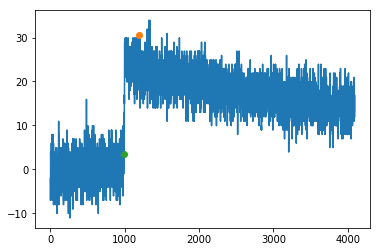

6610


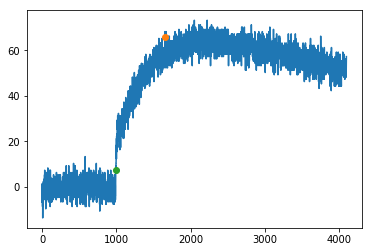

4080


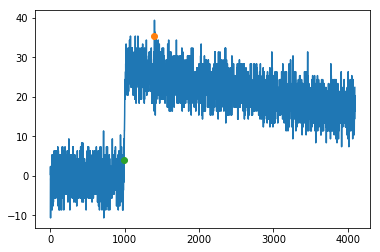

3130


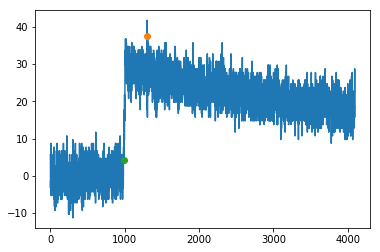

2020


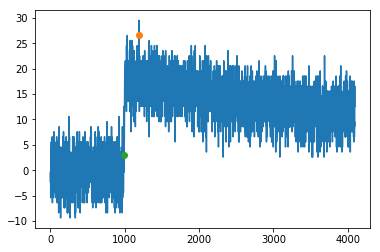

2030


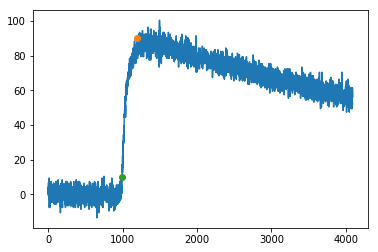

2640


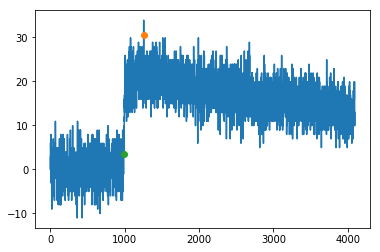

2140


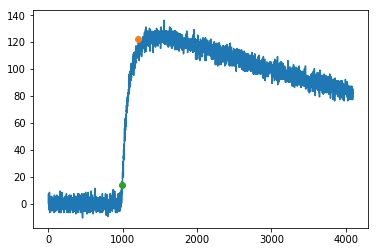

2010


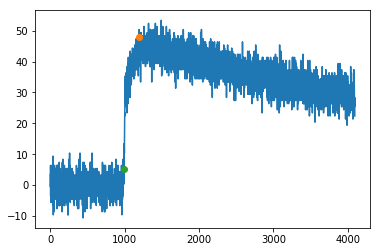

2290


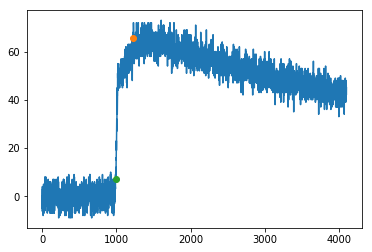

6870


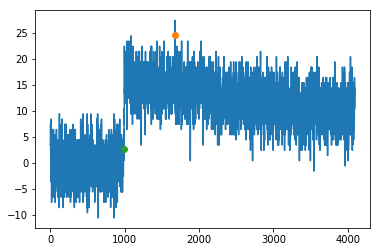

3250


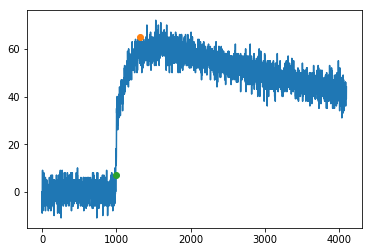

1810


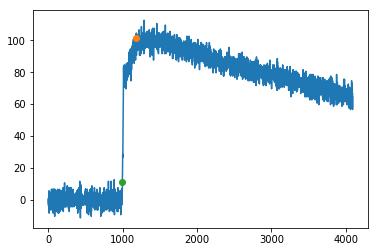

6890


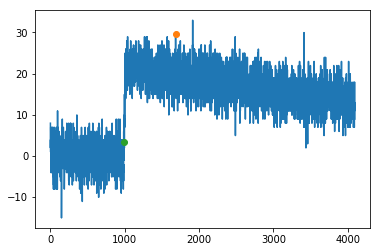

10700


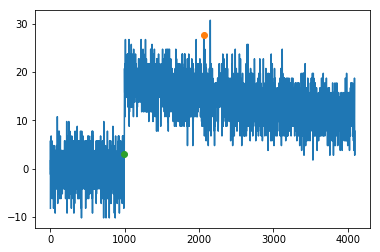

1810


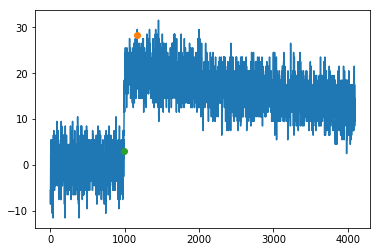

2570


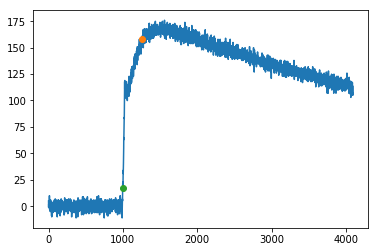

2290


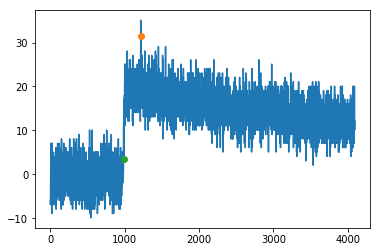

1780


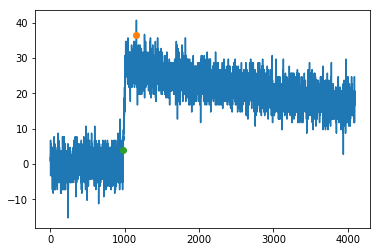

5450


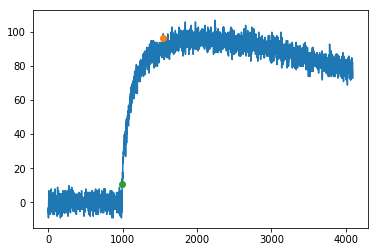

2890


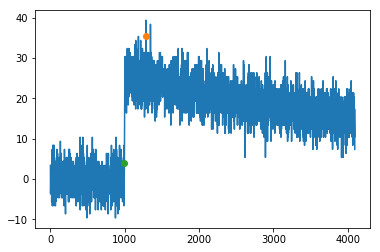

1760


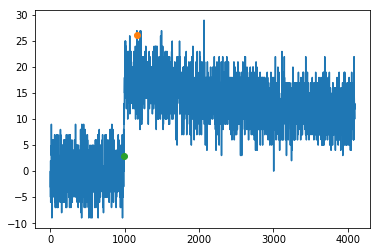

2510


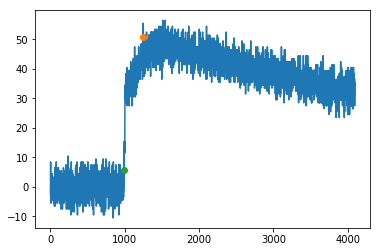

3470


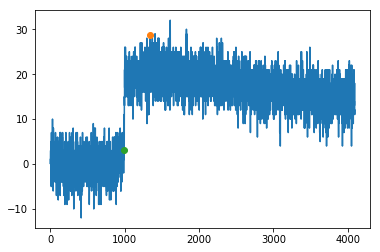

1570


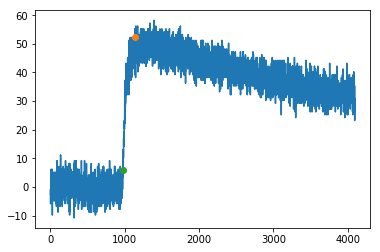

2190


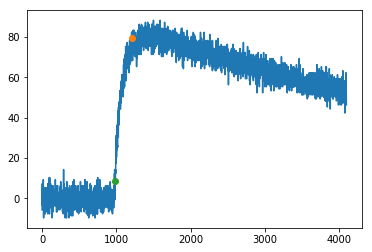

2190


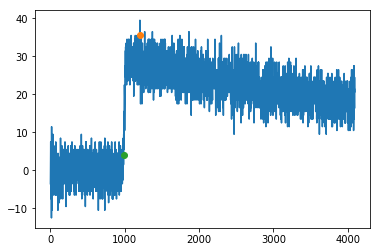

2710


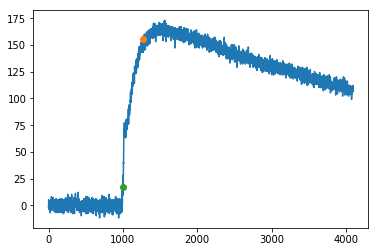

1960


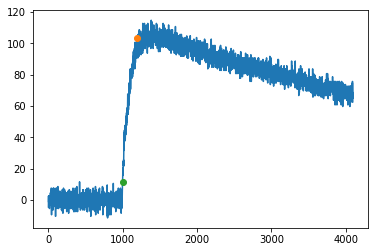

3730


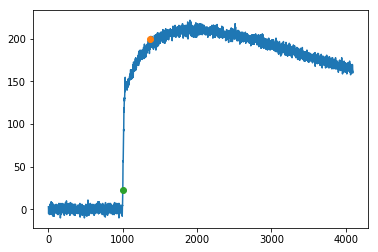

4800


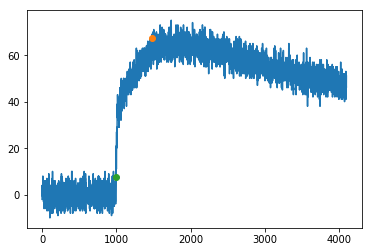

1540


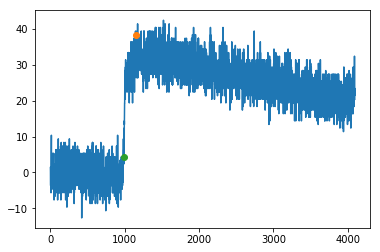

2020


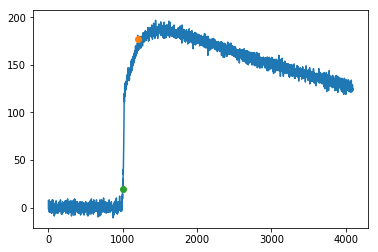

3530


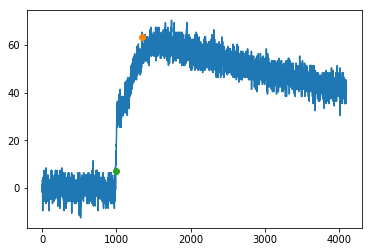

1990


5400


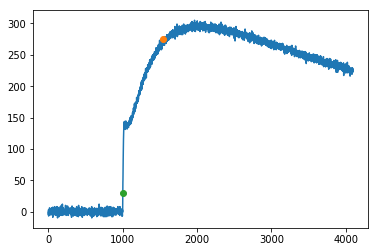

2560


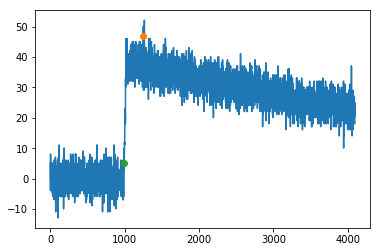

2910


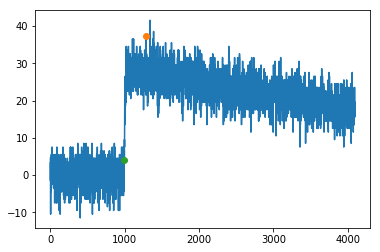

3280


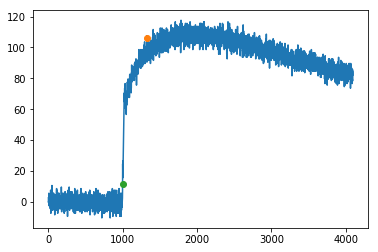

2110


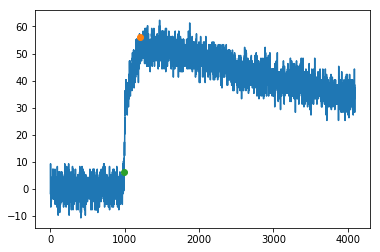

2160


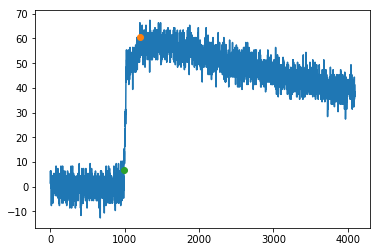

1610


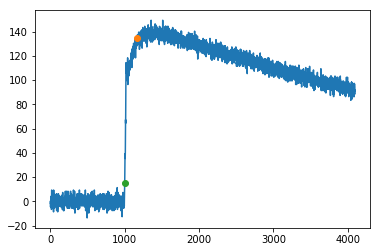

1590


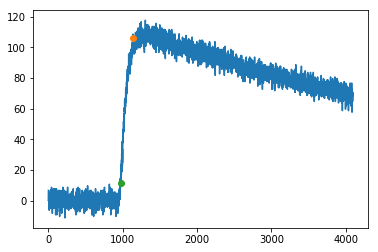

4600


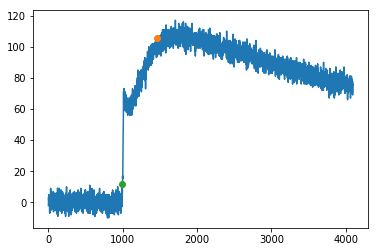

1570


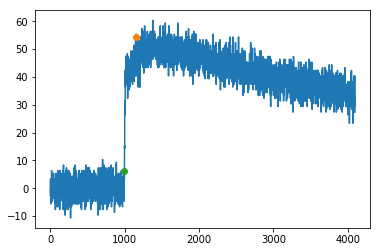

1990


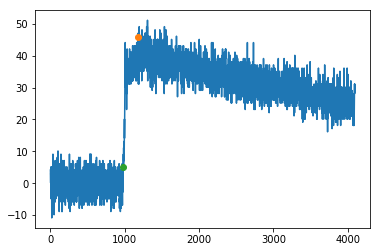

1650


1710


In [18]:
cs_risetimes= []
for sig in cs_baseline_corrected_signals:
    dt = calculate_signal_rise_time(sig)
    cs_risetimes.append(dt)
#print(cs_risetimes)

In [19]:
print(min(cs_risetimes))
print(max(cs_risetimes))

0
15990


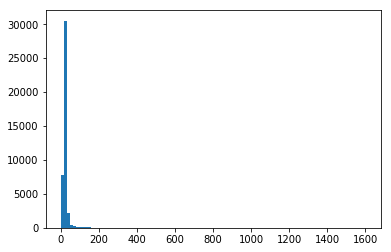

In [70]:
plt.hist(cs_risetimes, 100)
plt.show()

In [ ]:
number_of_events = len(cs_raw_data)

k_fwhm_values = []
k_fwhm_values_err = []
k_fwhm_pulser_values = []
k_values_ns = []

m = 25
k = 1164

nbins = 2048

cs_nrgs=[]
cs_nrgs = np.apply_along_axis(fast_trapezoidal_filter_energy, 1, 
                              cs_baseline_corrected_signals, k, m, M)
    
cs_counts, bin_edges = np.histogram(cs_nrgs, bins=2048, range=[0,2048])
cs_bins = (bin_edges[1:]+bin_edges[:-1])/2 # bin centers from bin edges
plt.plot(cs_bins, cs_counts)
plt.show()
cs_peak_fwhm, cs_peak_center, err = fit_gaussian_peak_linear_background(cs_bins, cs_counts)
k_fwhm_values.append(round(cs_peak_fwhm / cs_peak_center, 7) * 100)
k_fwhm_values_err.append(err * 100 / cs_peak_center)
    
plt.figure()
plt.cla()
plt.clf()
plt.xlabel('gap time (ns)')
plt.ylabel('fwhm (%)')
plt.errorbar(m_values_ns, m_fwhm_values, yerr=m_fwhm_values_err, ecolor='b')
plt.plot(m_values_ns, m_fwhm_values, 'o-b')
plt.title('Gap vs Energy Resolution')
plt.savefig('../figures/gap_optimization_cs.pdf')
plt.show()

In [57]:
cs_nrgs = np.apply_along_axis(fast_trapezoidal_filter_energy, 1, 
                              cs_baseline_corrected_signals, k, m, M)
co_nrgs = np.apply_along_axis(fast_trapezoidal_filter_energy, 1, 
                              co_baseline_corrected_signals, k, m, M)
am_nrgs = np.apply_along_axis(fast_trapezoidal_filter_energy, 1, 
                              am_baseline_corrected_signals, k, m, M)

NameError: name 'k' is not defined

In [54]:
tenevents = read_ten_event_file()
ndata = len(tenevents)
nsamples = 4096
tenevents = fast_baseline_correction(tenevents)

risetimes= []
for sig in tenevents:
    dt = calculate_signal_rise_time(sig)
    risetimes.append(dt)
print(risetimes)
plt.hist(risetimes)
plt.show()

[19, 20, 25, 21, 5, 20, 20, 9, 9, 22]


In [18]:
%run ./lab1_analysis_functions.py

In [19]:
tenevents = read_ten_event_file()

M = find_M_value(tenevents)
print('M ', M)

('M ', 4445.9118105773478)


In [20]:
filename = '../data/Am_pulser_real.h5'
am_raw_data = import_data(filename)

filename = '../data/Cs_pulser_real.h5'
cs_raw_data = import_data(filename)

filename = '../data/Co_pulser_real.h5'
co_raw_data = import_data(filename)

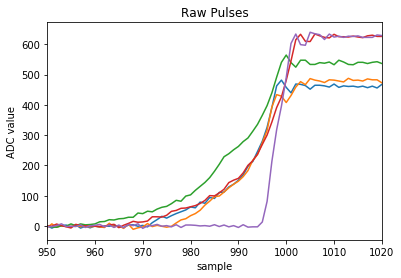

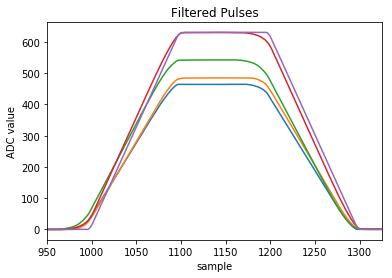

In [7]:
tenevents = read_ten_event_file()
ndata = len(tenevents)
nsamples = 4096
x_values = np.linspace(0, nsamples, nsamples)
tenevents = fast_baseline_correction(tenevents)
plt.figure()
plt.cla()
plt.clf()
for event in tenevents[0:5]:
    plt.plot(event)
plt.xlim([950, 1020])
plt.title('Raw Pulses')
plt.ylabel('ADC value')
plt.xlabel('sample')
plt.savefig('../figures/tenevents_rawdata.pdf')
plt.show()

k = 100
m = 100

plt.figure()
plt.cla()
plt.clf()
for event in tenevents[0:5]:
    event = fast_trapezoidal_filter(event, k, m, M=4400)
    plt.plot(x_values, event)
plt.xlim([950, 1325])
plt.title('Filtered Pulses')
plt.ylabel('ADC value')
plt.xlabel('sample')
plt.savefig('../figures/tenevents_filtered.pdf')
plt.show()

In [5]:
filename = '../data/Am_pulser_real.h5'
am_raw_data = import_data(filename)

filename = '../data/Cs_pulser_real.h5'
cs_raw_data = import_data(filename)

filename = '../data/Co_pulser_real.h5'
co_raw_data = import_data(filename)

In [6]:
cs_baseline = np.mean(cs_raw_data[:len(cs_raw_data),0:799],1).reshape((len(cs_raw_data),1))
cs_baseline_corrected_signals = cs_raw_data[:len(cs_raw_data),] - cs_baseline

In [7]:
# M = find_M_value(cs_baseline_corrected_signals[0:len(cs_raw_data)])
M = 5920.5649833
optimal_M = M
print('optimal M: ', M)

('optimal M: ', 5920.5649833)


In [9]:
# OPTIMIZE GAP TIME

m_values = np.linspace(0, 100, 30)
k = 100

number_of_events = len(cs_raw_data)
#number_of_events = 10000
assert number_of_events <= len(cs_raw_data)
ndata = 4096

m_fwhm_values = []
m_values_ns = []
m_fwhm_values_err = []

for m in m_values:
    m = int(m)
    m_values_ns.append(m * 10)
    
    cs_nrgs=[]
    cs_nrgs = np.apply_along_axis(fast_trapezoidal_filter_energy, 1, cs_baseline_corrected_signals, k, m, M)
    nbins = 2048
    cs_counts, bin_edges = np.histogram(cs_nrgs, bins=2048, range=[0,512]) #, range=Cs_range) # WORKS
    cs_bins = (bin_edges[1:]+bin_edges[:-1])/2 # bin centers from bin edges
    cs_fwhm, cs_center, err = fit_gaussian_peak_linear_background(cs_bins[1000:2000], cs_counts[1000:2000])
    m_fwhm_values_err.append(err* 100 / cs_center)
    m_fwhm_values.append(round(cs_fwhm / cs_center, 7) * 100)

In [10]:
plt.figure()
plt.cla()
plt.clf()
plt.xlabel('gap time (ns)')
plt.ylabel('fwhm (%)')
plt.errorbar(m_values_ns, m_fwhm_values, yerr=m_fwhm_values_err, ecolor='b')
plt.plot(m_values_ns, m_fwhm_values, 'o-b')
plt.title('Gap vs Energy Resolution')
plt.savefig('../figures/gap_optimization_cs.pdf')
plt.show()

In [11]:
optimal_gap_time =  int(m_values_ns[np.argmin(m_fwhm_values)]) / 10
m = optimal_gap_time 
print('optimal gap time: ' + str(m * 10))

optimal gap time: 550


In [12]:
# OPTIMIZE PEAKING TIME

k_values = np.logspace(np.log10(10), np.log10(2000), 50, endpoint=True, base=10)
number_of_events = len(cs_raw_data)
assert number_of_events <= len(cs_raw_data)

k_fwhm_values = []
k_fwhm_values_err = []
k_fwhm_pulser_values = []
k_values_ns = []
m = 25

nbins = 2048

for k in k_values:
    k = int(k)
    k_values_ns.append(k * 10)
    
    cs_nrgs=[]
    cs_nrgs = np.apply_along_axis(fast_trapezoidal_filter_energy, 1, cs_baseline_corrected_signals, k, m, M)
    
    cs_counts, bin_edges = np.histogram(cs_nrgs, bins=2048, range=[0,512])
    cs_bins = (bin_edges[1:]+bin_edges[:-1])/2 # bin centers from bin edges
    cs_bins = cs_bins[1000:2000]
    cs_counts = cs_counts[1000:2000]
   # plt.plot(cs_bins, cs_counts)
   # plt.show()
    cs_peak_fwhm, cs_peak_center, err = fit_gaussian_peak_linear_background(cs_bins, cs_counts)

    k_fwhm_values.append(round(cs_peak_fwhm / cs_peak_center, 7) * 100)
    k_fwhm_values_err.append(err * 100 / cs_peak_center)

In [14]:
plt.figure()
plt.cla()
plt.clf()
plt.xlabel('peaking time (ns)')
plt.ylabel('fwhm (%)')
plt.loglog(k_values_ns, k_fwhm_values, 'o-b')
plt.errorbar(k_values_ns, k_fwhm_values, yerr=k_fwhm_values_err, ecolor='b')
plt.title('Peaking Time vs Energy Resolution')
plt.tick_params(axis='y', which='minor')
plt.savefig('../figures/peak_optimization_cs.pdf')
plt.show()

In [15]:
optimal_peaking_time = k_values_ns[np.argmin(k_fwhm_values)] / 10
k = optimal_peaking_time
print('optimal peaking time:' + str(k * 10))

('optimal peaking time: ', 1164)


In [16]:
# Final Filter Paramters
print("========  Final Filter Parameters  ========")
print(' gap time (m)     = ' + str(m * 10) + ' ns')
print(' peaking time (k) = ' + str(k * 10) + ' ns')
print(' decay time (M)   = ' + str(round(M / 10,2)) + ' ns')
print("===========================================")

save_parameters(m * 10 , k * 10 , M / 10)

========  Final Filter Parameters  ========
 gap time (m)     = 250 ns
 peaking time (k) = 11640 ns
 decay time (M)   = 592.06 ns


In [17]:
cs_baseline = np.mean(cs_raw_data[:len(cs_raw_data),0:799],1).reshape((len(cs_raw_data),1))
cs_baseline_corrected_signals = cs_raw_data[:len(cs_raw_data),] - cs_baseline

am_baseline = np.mean(am_raw_data[:len(am_raw_data),0:799],1).reshape((len(am_raw_data),1))
am_baseline_corrected_signals = am_raw_data[:len(am_raw_data),] - am_baseline

co_baseline = np.mean(co_raw_data[:len(co_raw_data),0:799],1).reshape((len(co_raw_data),1))
co_baseline_corrected_signals = co_raw_data[:len(co_raw_data),] - co_baseline

cs_nrgs = np.apply_along_axis(fast_trapezoidal_filter_energy, 1, cs_baseline_corrected_signals, k, m, M)
co_nrgs = np.apply_along_axis(fast_trapezoidal_filter_energy, 1, co_baseline_corrected_signals, k, m, M)
am_nrgs = np.apply_along_axis(fast_trapezoidal_filter_energy, 1, am_baseline_corrected_signals, k, m, M)

In [18]:
make_nrg_sample_file(co_nrgs[0:len(co_nrgs)], '../data/co_energies.txt')
make_nrg_sample_file(cs_nrgs[0:len(cs_nrgs)], '../data/cs_energies.txt')
make_nrg_sample_file(am_nrgs[0:len(am_nrgs)], '../data/am_energies.txt')

In [19]:
# GET ENERGY RESOLUTION FOR DIFFERENT PEAKS

fwhm_peak_values = []
fwhm_peak_energies = []
fwhm_pulser_values = []
peak_err = []
pulser_err = []

# AM-241
am_counts, bin_edges = np.histogram(am_nrgs, bins=2048, range=[0, 400])
am_bins = (bin_edges[1:]+bin_edges[:-1])/2 # bin centers from bin edges
am_bins = am_bins[10:250] 
am_counts = am_counts[10:250]
peak_fwhm, peak_center ,err = fit_gaussian_peak_linear_background(am_bins, am_counts)
fwhm_peak_values.append(round(peak_fwhm / peak_center, 7) * 100)
fwhm_peak_energies.append(59.536)
peak_err.append(err * 100 / peak_center)

# AM-PULSER

am_counts, bin_edges = np.histogram(am_nrgs, bins=2048, range=[0, 400])
am_bins = (bin_edges[1:]+bin_edges[:-1])/2 # bin centers from bin edges
am_bins = am_bins[1000:2000] 
am_counts = am_counts[1000:2000]
pulser_fwhm, pulser_center ,err = fit_gaussian_peak_linear_background(am_bins, am_counts)
fwhm_pulser_values.append(round(pulser_fwhm / pulser_center, 7) * 100)
pulser_err.append(err* 100 / pulser_center)

# CS-662
cs_counts, bin_edges = np.histogram(cs_nrgs, bins=2048, range=[0, 512])
cs_bins = (bin_edges[1:]+bin_edges[:-1])/2 # bin centers from bin edges
cs_bins = cs_bins[1000:2000]
cs_counts = cs_counts[1000:2000]
cs_peak_fwhm, cs_peak_center, err = fit_gaussian_peak_linear_background(cs_bins, cs_counts)

fwhm_peak_values.append(round(cs_peak_fwhm / cs_peak_center, 7) * 100)
fwhm_peak_energies.append(661.615)
peak_err.append(err* 100 / cs_peak_center)

# CS-PULSER
cs_counts, bin_edges = np.histogram(cs_nrgs, bins=2048, range=[900, 900+512])
cs_bins = (bin_edges[1:]+bin_edges[:-1])/2 # bin centers from bin edges
cs_bins = cs_bins[100:1000]
cs_counts = cs_counts[100:1000]
cs_pulser_fwhm, cs_pulser_center, err = fit_gaussian_peak_linear_background(cs_bins, cs_counts)
fwhm_pulser_values.append(round(cs_pulser_fwhm / cs_pulser_center, 7) * 100)
pulser_err.append(err * 100 / cs_pulser_center)

# CO-1173
co_counts, bin_edges = np.histogram(co_nrgs, bins=2048, range=[0, 1024])
co_bins = (bin_edges[1:]+bin_edges[:-1])/2 # bin centers from bin edges
peak_1_fwhm, peak_1_center, err = fit_gaussian_peak_linear_background(co_bins[1200:1450], co_counts[1200:1450])
fwhm_peak_values.append(round(peak_1_fwhm / peak_1_center, 7) * 100)
fwhm_peak_energies.append(1173.231)
peak_err.append(err * 100 / peak_1_center)

# CO-1332
co_counts, bin_edges = np.histogram(co_nrgs, bins=2048, range=[0, 1024])
co_bins = (bin_edges[1:]+bin_edges[:-1])/2 # bin centers from bin edges
co_bins = co_bins[1400:1600]
co_counts = co_counts[1400:1600]
peak_2_fwhm, peak_2_center,err = fit_gaussian_peak_linear_background(co_bins, co_counts)
fwhm_peak_values.append(round(peak_2_fwhm / peak_2_center, 7) * 100)
fwhm_peak_energies.append(1332.508)
peak_err.append(err * 100/ peak_2_center)

# CO-PULSER
co_counts, bin_edges = np.histogram(co_nrgs, bins=2048, range=[512, 1024])
co_bins = (bin_edges[1:]+bin_edges[:-1])/2 # bin centers from bin edges
co_bins = co_bins[1800:] 
co_counts = co_counts[1800:]
pulser_fwhm, pulser_center,err = fit_gaussian_peak_linear_background(co_bins, co_counts)
fwhm_pulser_values.append(round(pulser_fwhm / pulser_center, 7) * 100)
pulser_err.append(err * 100/ pulser_center)

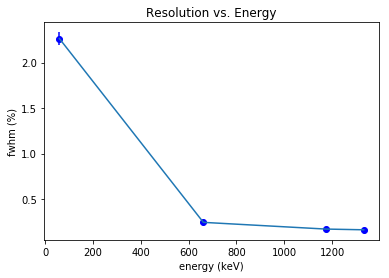

In [20]:
plt.plot(fwhm_peak_energies, fwhm_peak_values, 'ob')
plt.errorbar(fwhm_peak_energies, fwhm_peak_values, yerr=peak_err, ecolor='b')
plt.title('Resolution vs. Energy')
plt.ylabel('fwhm (%)')
plt.xlabel('energy (keV)')
plt.savefig('../figures/fwhm_vs_energy.pdf')
plt.show()

In [27]:
# find fano factor

fano_list = []
fwhm_elec = np.mean(fwhm_pulser_values) # Am-241 pulser value is very differnet. Shouldn't depend on energy. Ignore for now.
for i in range(0, len(fwhm_peak_energies), 1):
    e = fwhm_peak_energies[i]
    fwhm =(fwhm_peak_values[i] / 100) # was a percent
    fwhm = fwhm - (fwhm_elec / 100)
    fwhm = fwhm * fwhm_peak_energies[i] #fwhm in kev
    fano =fwhm * (1/2.35) * np.sqrt(1/(e*(2.9*10**(-3)))) 
    fano = fano**2
    fano = round(fano, 3)
    fano_list.append(fano)
    
fano = round(np.mean(fano_list[1:]),3)
print('average fano factor: ' + str( fano))
print('list of fano factors: ' + str(fano_list[1:]))

average fano factor: 0.039
list of fano factors: [0.072, 0.025, 0.021]


In [22]:
print('ANALYSIS COMPLETE')

ANALYSIS COMPLETE
